In [2]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

%matplotlib inline
import tensorflow as tf
print(tf.__version__)

# EXPECTED OUTPUT
# 2.0.0-beta1 (or later)


2.2.0


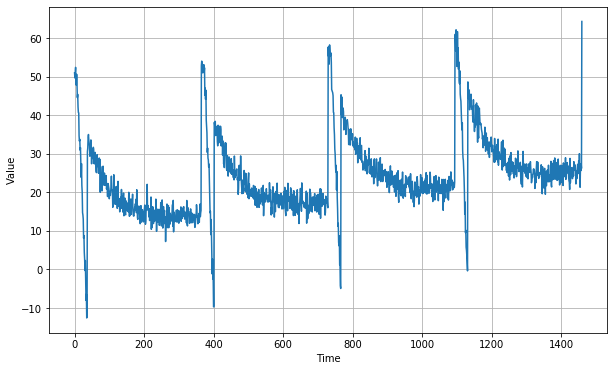

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUTdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmYAAAFzCAYAAACU38U/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydd5wU5f3HP89su07n6BxIkyJVUFFcEXss0WjUxMQ0k/zSNEYliTEae4wxxhgjMcYeewdBBA4EBOFAeoc7OModHNfrluf3x+zszk7b2b3dndnb7/v14sXu7JTn5pl5nu/zrYxzDoIgCIIgCMJ6BKsbQBAEQRAEQYiQYEYQBEEQBGETSDAjCIIgCIKwCSSYEQRBEARB2AQSzAiCIAiCIGwCCWYEQRAEQRA2wWl1A5JB7969eUlJScqv09zcjPz8/JRfJ5Oge6IN3Rc1dE+0ofuihu6JNnRf1GTqPSkrKzvBOe+j9VuXEMxKSkqwfv36lF+ntLQUXq835dfJJOieaEP3RQ3dE23ovqihe6IN3Rc1mXpPGGMVer+RKZMgCIIgCMImkGBGEARBEARhE0gwIwiCIAiCsAkkmBEEQRAEQdgEEswIgiAIgiBsAglmBEEQBEEQNoEEM4IgCIIgCJtAghlBEARBEIRNIMGMIAiCIAjCJpBgRhAEQRAEYRNIMCMIgiAIgrAJJJgRBEEQBEEAWLX3BHZXNVraBhLMCIIgCIIgAPzyfxvx0hfllraBBDOCIAiCIAgA3OoGgAQzgiAIgiAIAADnHAzM0jaQYEYQBEEQBGETSDAjCIIgCIKAaMpk1irMSDAjCIIgCIKQsFguI8GMIAiCIAgCALgNvP9JMCMIgiAIgkDI+d9iWyYJZgRBEASh4A/vb8V3nv/S6mYQWYjT6gYQBEEQhN14eU0FAKDNF0COy2Fxa4h0YQNLJmnMCIIgCEKPMX9YiK2H661uBpFGKCqTIAiCIGzMpso6q5tApAsbqMxIMCMIgiAIGUfqWqO+2yFSj0gPHKDM/wRBEARhJ655ZnXUd06SWVaR1aZMxlh3xtjbjLGdjLEdjLEzGWM9GWOLGWN7Qv/3sLKNBEEQRHZxtL4t6nuQ5LKswQ5CuNUasycBLOScjwEwEcAOAHMBLOGcjwSwJPSdIAiCICzBDpM1kT6yNvM/Y6wbgFkA/gMAnPMOznkdgCsBvBja7UUAV1nTQoIgCIIgjVk2YYeuZlatBBhjkwDMA7AdorasDMCvABzmnHcP7cMA1ErfFcffAuAWACguLp76+uuvp7zNTU1NKCgoSPl1Mgm6J9rQfVFD90Qbui9qrL4nNy9sjvp+wxg3LipxWdSaCFbfFzuS7Htyy+JmzB7sxPVjPEk7pxbnnXdeGed8mtZvViaYdQKYAuAXnPO1jLEnoTBbcs45Y0xTcuScz4Mo2GHatGnc6/WmuLlAaWkp0nGdTILuiTZ0X9TQPdGG7osay+/JwvlRX4cPPwXeWcMtakwEy++LDUn2PXEsWYghQ4bA6z01aeeMFyt9zCoBVHLO14a+vw1RUKtijPUHgND/1Ra1jyAIgiDAbWHgItKBHfraMsGMc34MwCHG2OjQpvMhmjU/BPDd0LbvAvjAguYRBEEQWYpTiHb/Jh+z7MJq53+ra2X+AsCrjDE3gP0AvgdRWHyTMfYDABUArrOwfQRBEESW4XQw+GXSGAVlZg926GtLBTPO+VcAtJzfzk93WwiCIAgCAFyCgDYEw9+DdpitibTAActVZlbnMSMIgrAtze1+XPPMauyparS6KUQacTiiZ2bKY5ZdUEkmgiAIm/J2WSXKKmrx8Cc7rW4KkUaUPmYkl2URNuhrEswIgiA0KKuoxR8/3AYAaOnwW9waIp04heipkZz/swcOnt21MgmCIOyKvJB1S0fAwpYQ6capMGU+8dlui1pCWIHVUZkkmBEEQcSABLPsQmnKJLIHO5itSTAjCIKIQSsJZlmFYLUti7AUq7ufBDOCIAgN5INzq48Es2zC6omZsA4bKMxIMCMIgtBCPjeT83920S3X+oLlhDVwzildBkEQhN1p8wXx2tqDVjeDSCPnjOxtdRMIi7BaY0qCGUEQhAl+994Wq5tApAk7mLMIa7BD35NgRhAEoQGzetlMWIZWZF6QkpllDVa/+SSYEQRBEEQMAnbIo0CkHDt0MwlmBEEQGkwv6Rn1vV9RjkUtIdINh1pjGiCNWfZgsbacBDOCIAgNRhYXhD/PGtUH3BbeJ0S6UE7NfhLMsgYyZRIEQdicQo+TksxmExr2rECABLOuDreDHRMkmBEEQWgiH6MLc5xo8wetawyRVkRTZvQ2f5D6P1uwOu6HBDOCiMHzKw/gwIlmq5tBWEi+x4kOf5Ai87II5dxMPmZdH5sozEgwIwgjGtt8+NPH23Hds19Y3RQizch9ygo8TgBAm5/MmdmA1gS9eEdV+htCpBWp2ynzP0HYmLoWHwDgeGO7xS0hrCQsmPnInJUtKKMyf//eVotaQqQbMmUShI052dwR/uwL0KScTci1Jh6XOFSSOSs7oAjc7ISc/wkiA6htiQhmI3//CZXlyUKunDQATkEcKoM2GbiJ1MK59SkTCOuwuu9JMCMIA+pbfVHfqZB19sAB9C5w48nrJ8MRGikpl1X2YLU5i0g/dnm7STCLg60n/OigkPmswke5i7IWUTkmzs5CaJamqMzsQFKMFuY4rW0IkVakfrdaKCfBzCRlFbX4y/p2PL54l9VNIdKIls/B3upGC1pCWIE0QDsd4gfyMcsmGFbeNRs3n1VidUOINKMM/Eg3JJiZ5HBdKwCgsrbV4pYQ6URrGv50O4XNZweR3pc0ZmTKzA6kXu6W60K3XJelbSHSh12CPkgwM0lrhx8AkOtyWNwSwmoKc2igzhakdbNDCJkyyfk/K+Cch7WlF43rBwDoXeCxsEVEOrDL602CmUlaQnXy8twkmGUVGi9qEfmdZAXyQdrByJSZbUhC+dgBRZg+rCdONLXjmdJ9lraJSA/kY5YhSIJZLglmWQ9pTbMHaYCWNGYkmGUnzlD/P7pwp8UtIbIBEsxMsONoAx5bJDr957lIW5JNaPkc0NycHURpzEgwyzrkWhOng6bKbCKrSzIxxsoZY1sYY18xxtaHtvVkjC1mjO0J/d/DyjYCgMcZuU0fbjqMhjafwd5EV0KanH923il4/NqJAMjPKJuQBmhBEsyo77MCZTe7BEpqlg3Y5fW2wzLgPM75JM75tND3uQCWcM5HAlgS+m4p3fPc4c/7jjfjjrc2Wdgawgq+fcZQTBzcDQBF5mULcm2pZMqiPGbZAQeP0ppI6VKIro30zpOPmZorAbwY+vwigKssbAsAtbO3lDqD6PrIp2FKMppdcC7zMSPn/6wjypQp2HGqJFKF1WK41U8bB/ApY6yMMXZLaFsx5/xo6PMxAMXWNC2C0r/ALupOIn0wMPIzykKkAVqgvs8qaIzPTuzS71Z7sp/NOT/MGOsLYDFjLCrkhXPOGWOatyokyN0CAMXFxSgtLU15YyUaG5vSej0709TUte/FrkOiP+EXX6yGVJ1p+44d6NW41/C4rn5fEiHT7snRY+1oaw+gtLQUe2rFqOwNX21CR2Vyo3Iz7b6kA6vvSXNLC44fbw23oaq6Lfyble2y+r7YkWTekza/OMjv378fpfxQUs6ZCJYKZpzzw6H/qxlj7wGYDqCKMdafc36UMdYfQLXOsfMAzAOAadOmca/Xm9K2/tF1APd9tB0AkF9QAK/3nJReL1MoLS1Fqu+9lRxeWwFs24qzzjpLdPpfvhQjRo2Gd/oQw+O6+n1JhEy7Jx8f34QDzTXwer0oOlgLrF2N8RMmwDu6b1Kvk2n3JR1YfU/yNixH374F8HqnAgBeO7geqBIrfljZLqvvix1J5j1pavcDny3CKacMh3fWKUk5ZyJYZspkjOUzxgqlzwAuBLAVwIcAvhva7bsAPrCmhdF8b+aw8Get+olE14aB/IyyDUowm71wHu38T92eHUhzu9XpMqzUmBUDeC9ULNQJ4DXO+ULG2DoAbzLGfgCgAsB1FraRyHLkk7NAZXmyFvIvzEJkczMtxrMLq6MyLRPMOOf7AUzU2F4D4Pz0t8g89I5mD+GuZqQ1yTbk6TKoVmZ2oezlIhOFzO9+fwvGD+iG62O4ORD2xS5vt9XO/xmJXSrQE+mDgcHhIMEs21CXZLKwMUT64NEpE3rlu3V3lXhlzUEAIMGM6DRWp8vISGheziJkGhLSmGUZcjN2qO/9QZLMspFR/QqtbgKRBuyiECfBLA6sTjpHWAdjMq2JXd5eIqVwRDRmTjJlZhVi30dG/GunDgIADOudb1GLiLQQer2ZxU5mJJjFwc3jRXW2vHYm0bWhzP/ZjRSdRabM7EM+NTPGcPnEAZa1hUgvVithyMcsDs4d5MKhQHccqWuLvTPRJZAUJAwRrQlNztmBPBJPoFqZWYVWFKZTYOTG0MWxi/84qX7ixO0U0EEzc9bBGAtPzi+vKbe2MUTaUJoyqYB9diA3Y0s4SDDr8oQX4lTEPLNwOwT4SDDLGrRWzieaOixoCZFutMzY5F+YvTgFRsEfWYLVpkwSzOLE5RDQ4aeXM9tQvqibDtVZ0g4ivUj97nGJQ2VdMwnl2QDn6ndeMKkx+/17WyghbYZil14jwSxO3E4SzLIJvRf1yqdXpbUdRPqRz61FOS5MGNgNS3dplu4luiDKyDxRYxZ76n517UEyeWc4FJWZYbgc5GOWTdjF54CwBvkAfdG4Ymw8WIdj9RT809XRcgJ3CAyBgDmBy29yP8Je2EXTSYJZnHhIY5aVWF3Ulkg/yiH64vH9AABLdlalvzFEWtEyZToFZtrHkHzRMhOpd61eiJNgFicuh4B2fxB1LeRrkg3YY/1EWAHnPGpyPqVPAfLcDuyrbrasTUQaUUVlCqZNlKv21mDt/poUNIpIB1Yvw0kwi5MTTe0AgNve+MrilhDpgMsTmRHZh6zfGWMY0D0XR+padXe/7Y2vcO2/VqehYUQq0VKM5bhEa4mZqPyfvFKGb85bk4KWEanEJpZMSjAbLydDUVmHDQZngiAyH60xekD3XByt13/339t4OHUNItKK0n2hZ6iQeV2LD30KPVY0iUgX5PyfWTS2+QEA+R6SabMJ6T199JoJ1jaESCvK4Tnf7UCrLxDzuEXbjqWmQYRlSILZSUqZ0mWhzP8ZyrgBRQCAAd1yLW4JkU6kCdouqm4iDWj0tdMhwGci4u7HL5eloEFEuuCcq5QmkmBW09xuQYuItGATzxUSzOLkzovHAACKi3IsbgmRDpSCGKUnyi6U+YxcDkaVP7IE5eTcu0A0X1Llj64PRWVmGG6ngB55LnQEYpsziMxHUm1LE/T0YT2sbA6RRrTMGi5BoBxVWYBWDw/sLlpJKmtbNI/pFdKoyVm99wRK5s7HoZPaxxD2wi5vNglmCUDZ/7MPaQE1om8hZo7ohalDSUDLBlS5rEhjljUotSb5Hid65rtRWasd/MEY0FcRFPBWWSUA4MsDJ1PSRiI1WJ23kgSzBCDBLHvQ8ikTmLmaeURmo9X3LodAglkWoOdL2rfQg+ON2j5mnIvPh+ZvyWoYkVLs4kNMglkCuKksU9YhXz07BIagXd5gIqUotSYuh7l6iURmw8E1tSYelwPtBotypyP6GPm35nY/fvJyGZX0sjER1xVr20GCWQK4nQ7SmGUJWlOwgzRmWYGW7O0kjVnWoDU5e5wC2nXSpXCIZZuU2wAxynP+lqNYuO0Y/vLpruQ2lEg6FJWZgbidguGqieg6RBL/R15VQSDBLBvQ0pq4BAZfgNum2DGRGvS61xNj7HcK0VOqJMS3dARw9/tbAYDGDhtjl9eaBLME8DjIxyzbiDJlMjJlZgtqU6Y4ZNLk2vXR1pjpmzI556pI3g0VtQCAN9YdCs8Z7208TAmIbQ6ZMjMQt5N8zLIFrZQJDtKYZQV6pkwAppLMEpmLXu96XALa/fqpkpTDwpGQP5nbGT3VUgJie2KXt5oEswTIczvQ2kF5zLIBzahMgVGi2SzFFXLu9gVjL8zmrdiX6uYQKUJ879VqkxynA+0+HY0ZEDZxK2tp5rkdqv0fXbgTQRpIbIXUf5QuIwMpynWhodVndTMIi3AwMmVlA1o9LJkyzSSZfWjBziS3iEgnmqZMl7GPmbSQG11cGLU916UWzJ4p3Yfd1Y2daiORIsiUmXkU5bjQECpmTmQH8kGanP+zB2VJJikdgtnIzDYTBc8JO6L9fovO/zpRmRzICQlgxUU5KMpxhn8TBO2ZnqpI2Au7uA6TYJYARblONLX74Sc/s6xBrtom5//sQDPBrCD5mJl792uaqa5ipqIlShk5/wPA6SU98MjVE3DflePw+HWTwtv15goaR+wJpcvIQIpyXACApnbSmnV1tNIikPN/9qBVkgkw7/x/QidLPGFvjNJldPiDmuMC5xyMMVw/fQgKPE7kuCLTq15SYvJVtidKTXm6sVwwY4w5GGMbGWMfh74PY4ytZYztZYy9wRhTV4a1mL5FomPnmv1U/6yrE85jpjBl0ko3G1D3cd/CHADAqr0nTJ2hhSbejIRD38cMgKk8ljkyvzK9gIEWMnXbCrsM65YLZgB+BWCH7PujAJ7gnI8AUAvgB5a0yoALxhYDAHYdI8fNbEE+RlPm/+yAc/XkPHNELzAGHKnTLmStxG8iepOwJ5olmZyisKUlmClHBLnDv55fGmnM7ElWmzIZY4MAXAbgudB3BmA2gLdDu7wI4CprWqeP9HIGaNDt8miWZCJTZtagFMwYY8h1OUz7mJFzd2aiV9lBMk/qlWWSPy9yU2abnsaMBDNboZW30gqcsXdJKX8DcCcAKba4F4A6zrnkvFUJYKDWgYyxWwDcAgDFxcUoLS1NbUsBNDU1ha/jYMD+8gqUlh5N+XXtjPyedEUOHBCdt1esWA4hNOoeOdyODp/f8O/u6vclETLtnpyoaUNjO1e1mfEADlQcQmlpteqYU3sK2HEyMglv3LQZ7JjxMJtp9yUdWH1POnw+HDlyGKWl0SbrA4fFNEnLV65Gn7xovYbf70dlZSVKS48DAI63RJ6DusYmzets2rYDvRv3mm6X1ffFjiTznlQ1i322c+cOlMbRL8nGMsGMMfY1ANWc8zLGmDfe4znn8wDMA4Bp06ZxrzfuU8RNaWkppOs4P/sEAwcPhtd7asqva2fk96Qrssm/B9i7G+ee64UjFPK+qnk72JGDhn93V78viZBp9+Sl8nUINrbD6z07anvuys/Qt38xvN4JqmPm7VkDnKwJf+8+8BSgTz68o/vqXifT7ks6sPqeuFZ8ioEDB8DrHR+1vXHTEWDLRkyedjpG9I3OVeZctgiDBw2G1zsWAHC8sR1Y8RkAgDk9ANpU1xk0dDi8555iul1W3xc7ksx7Un6iGfi8FGPHngrv5EFJOWciWKkxmwngCsbYpQByABQBeBJAd8aYM6Q1GwTgsIVt1MUpMATITNHlkVTbcouWIDAE7OIlSqQMPXOWy8HgM1kr908fbwcA7H/oUt1cVoT94FwvXYaoJdMzTcrJdcf2MSNTpr2wy6humY8Z5/y3nPNBnPMSANcDWMo5/xaAZQC+EdrtuwA+sKiJhjgEphsCTXQ9oqIyGaNSKlmCVmSeyyHo+phxDkwb2gPPfGtK1PaGNqoUkmlopUzwuMw7/+fI6mPqRXG2dFDKJTtCJZnU3AXg14yxvRB9zv5jcXs0cToEcgDPArSUJg5GGrNsQK+HXQ5mmMdMYAynDe4ete0fS/eiZO58mogzBD1tqaQx09OAyWU5qeA9oK8ZI42ZvdDr93RjC8GMc17KOf9a6PN+zvl0zvkIzvm1nHNbZmgkjVl2IPWwfPWc4xLAuf7gDADNPo4v9tXo/k5kBlrrZpdDQIeexiz0xLgUZsvnVh4AAFTWmkuzQViL3sgeEcw0NGYJTOqULsNeRMZ7S5thD8EsE3EKjNJlZCkFHtE1s7ldPzfR3StbccO/11CtxAxGb551OwXjcmwsWlsi57DJ/GeEPZGSxuoljI13PieNGaEFCWYJIjAGKpWZBWjMzgVSSS6dQvb3z9+O2nbxOD3NCmF/OKC5dBZ9zIy1Iw4dR/+jderIPMKGaCQXBiIas5+8UqZyZdF6Im6bM8rwMgu3HUNNky2NQlmJTSyZJJglitNBGrNsQTlAF3jEVbNerVS5ucps9B5hT7RNmUzflMkj+2hxspkm4UxBywFcXmapulEtZCvHil/NGYnvnDnU8Do/f21jYg0kUkbW18rMVMjHLDvQ6uECj3ER+/5FOeHPvgDH1sP1WLuf/M0yDf10GfpRmYAozDkF9dBa4HHiZDNFZ2YCeiN7vieSYcqlMFfraVtiTfFbD9ebbxiRYuwxp5NgliBOKsuTFWjlMyrIEQfnpnbtSbYoNzJ4bz9aj689tRLfnLcGy3ZV4+U1Fcb+SYSt0Fo4u43SZYT+19KY9ch3kcYsQ+Cca/Z9viw3mVbKnFialslDItG6V08ZiLH9i8LjCWE9knBtdcZBEswSxCEIpDHLEpSDreT836jjYyZfSX//hfXhz9/77zr84f2t+O+q8uQ3kkgbLocAn1//3WdMe4LumefGyRbSmGUKWpOzPKhDmTJHr86i/Fm4aFy/8GeP04FzRvbGyeaOsHZ20bZj+OpQXSdaTSQDisrMUEhjlh1oDbaFYY1ZYjmpDtQ0d6pNRPrQ9DFz6qfLMLKE9Mh3o7a5IyntIlKLmZFda/w3ms/7FnrgkM34LgdDj3w32v1BtIait3/8chmuenpVnK0lkoVdZnQSzBLEQYJZ1qAcbPPD6TK0BbNYTwVNzpmBns9QrkswTBSrlzW8Z74bWw7XY09VIy58YjleXlORjGYSKSKW1kQZ+6XrYxY6zy2zhked0yEw9MxzAwBqmmhMsBOU+T9DIY1ZdqA12Oa5HGBMP11GLOrInJUxaJkk8z1OtOjksNMzZwEIT8IXPLECu6ua8If3tyankUTSMZM2wa8Vla8xn8sneXkaFZdDQHE3MVCIEg/bA0qXkeGIUZnkxN3V4VCvnAWBocDtRKOexizGy200eRP2Qa+fCjxONHf4daM2pefl8Wsn4uNfnB3e3iPfnfQ2EqmBg+s68l8wthgAEFT5mGkjnYZzMf+lhENgGF1cCADYU91om3JA2Yz0zpOPWYZCpszsQUutXZDjTFhjRmQGWhG5gKgxC3KE/YKUx0hcM3UQxg/sFv7eLdeVglYSqUJvbr5q0kAA0EwwrjVWnDZIfAZG9SuEINOYOQWG4iIPinKc2HWsMSppMQlp1kJRmRkK5THLDvTGxwKPU9f5P5ZGzGr/BcI8RikT9Ppfb7UtZY2XQxOwPTHqFskcqVqY6xxz5aSBWPYbL84d1QfyghCMMTDGMLpfIXZXNUYJ+vd/vIOeDQuwyy0nwSxBzPqYHTrZkobWEKmCQ1tt4nEJmoWMia6D3iCdb1Ar1WhEcGsIZsN+uwD76qheoi3REbAlwUxpygT0hfJhvfPFY2U7SJ+G9spHZW1rVF3d51cdIF9UCwjnMSNTZmbiEISYgtk7ZZU458/LsK78ZJpaRaQLwzx2MeR1jaTwhE3R0m7GisrVOmZMv0JNjRkAbKwmwcxuGL3CUiozda3M2At1uSlT8jcrzHGisc0fJZgRVkNRmRmJU2Dwxyhk/Pme4wCA8hOUtypj0fEzcgks4Qz+FTUteKessnPtIlKO3kQrCVhmNaa7HrgYH//ibE2NGQC4aBS2H1zf5UASqLQWZrGmc7nzf5tfFMQKc1xoavfjlpfKovb1UXBZ2rFLYBYNCQmS53ag2SCXEQA0hUwdHlnhWyLz0FJrOx36PoYcgFsAltx+Ln5+3gjV75W1rbj9rU1JbiWREnRKMgHQLMuk5RfkcTrgdAiq2ooSTgGoqGnG08v2kl+RjdAzZxmZMmMhfwSq6sUi6IUhDeyuqsaofeXBAGv31+CFVQfivh6RGGTKzFCKcl2obzX2AZBU0xS9l7noDb1OQTDWmDHglD4FuuYrgBy/7Y5e97ic+oIZoD+ou3UFM4bvPP8lHlu0C2+trwyPKw/O345pD3wWX6OJpGCkOZH8xFSmTBOvs1xjVtsiJpXVqyIx85Gl4QCTb85bg3s/2h7+bXdVI9XcTQF2GZJJMEuQbrkuNLb5UVmr79zvDBUybmgjJ85MhXOuadJwOswFf7gMBDOK6rU/WjKWocbM4Fx6pkyHLFnxne9sxv+9Kpq0/v35AZxooqLnVqGnNAlrzDSLmBufUy6Y/fHycQCM54eTGhUB9h1vwoVPrMBfPt0NAPjqUB0WbTtmfGEiLqyOmyfBLEGkQfabz67R3Ufq3PpWHx7+ZAfeXH8oDS0jko2mKVNgUaYGOXJNmJ75CkBMH0XCWvR6R+rTDoNC5lroCWYBHm0W21vdFNd5ieRjKl2GyQSzWsdePK4fSkKRmt+YMiiOdnEcbxSF9Q0HawEAVz29Cj9+Odo/bfXeEyiroKCzRNFLLpwuSDBLkCN1YgmNw3X6pTQk5+CapnY8u3w/7nx7c1raRiQPvQHaKQiGlR+k19rt0H/BX11LtRJtDdcWyt1OcaOWCcpoQleatb8/cxgAUXMqV76QItV6tCp+SAh6ecwQO0ehpDGTC+IjQ9n/tegIREdqml3L3fjcWlzzzBfmdibCkCkzw/nhOcMBiCsfPSTB7EhdW1raRKQGraHWYeT8L9tspDF7YP4OdPiD5GtmY7QmWqlPfTpRmXqrbeWzcP6pfQEAb+32RT0D9DzYAz0hS9/HzES6jNApzQYO/HPZPtwlW9B3xMioUdvcAe9jy0ydm9CHTJkZyrDe+RjUIzec00iL9lA49BEDrRphb3TNWTHSpUgvdve8SBkeKWO8nJe+KMew3y7Awq3kI2I39BzAXQn6mDkVgplcgyZPvXGiqQMnm9W+RUT6MBKydDP/I7aP2YzhvTCgWw5+MXukqXa8u/Ew3pC5wHTIr6nRxGW7qlFeQ0nNE4XSZXQBPE4hLHxp0eYTB1sjcydhbzjX1oA4HfoJhuVbe+RFCle/839nqfb976pyAMBPXilT/UZYj9ZEaySYAfqrbUHxg1yDpsyJJvcz03z6Yr0AACAASURBVHIyJ1JPvOkyzPRSt1wXVv/2fEwc3D2hNilz0CojM/WeScIclPm/C+BxOsLClxaS0EalezIbrXdUdP6P3a/dQ4LZiL4FGNOvSPV7S4xceIR16ClNJCf+Di2NqYGmJc8drV0vzNHXtsuVa9uPNpBwlmaMM/9LGjP1b6mezz854AvPJ+2BIEb8/pOo3zWfSSJurBbM9EcGIiZivURjjVmvfDdqyCyRseipto3SZcjn5h75oikzVyfJcCuVYbE1ms7/sTRmOoN6t1wXPvv1LKzccwI7jzVieJ8C3evKHbe/9tRKvPT96Zg1qo/5hhOdgutU/AAiDvyqqMwkyER5bgdaDBzJlh7yo235PgCiP5mSDlICdAq7iLWkMesEHqeAdiONmS+A/t1zorbVt/iwYMvRVDeNSBKcQ3OEdgqCocZMmpz7Fubgoa9PwL9umgoA+PDnM3Hm8F7h/Yw0roS16KfLCEVlJjAJjuhbiJtnDsMj15wGALj/qvGmjmukJNXpR0fCNspj1llVy39vPj3mPlLes4Mn1b5kZMpMDrGia1MNCWadYF15Lb4sP4ndilIaEm3+ILrnuqO23fnOJvzfqxuw7zjlKspkBMbQ0OZHdaM64lapZbtxxhAM7J4LADhtUHfcPLMkHU0kkoDWAO0QGBiL3/lfi29OG4xh3WIPw3qpWb7YV4OD5OydVvSiMpOBMkBE4rppkVxnDsEoN2L0c/L8SirjFA92iYgmwawTSC/mjqMNqt/afAF0+IPoXRAtmC3aVgUA2H5EfQxhT7TWTpsq6wAAv3t3a9zncyq9wAlbojdIM8bgcgi6pXTi6V23U8A9Z+TE3E8vAviGf6/BLEqPkFSkftfN/O8wymOWGMt+48UL3ztdd2zoU+gJf25p19eeKn3M/vTxdnxKVQFME7575Pyf+fTMd6u2SdmZB/fM0zxG+p2wP1pRmc2hwTGgocmItegSrPYsJUxhlGQ0z+1AS7vaFyiRBbeZLOOSxswfCJK5ymIcGj5mndW0DOudD+/ovrq/9y2MCO97DCpDaD0bt7xMEd/xYvUIbZlgxhjLYYx9yRjbxBjbxhi7L7R9GGNsLWNsL2PsDcaYWuqxCVdMHABAu+ZhdQzBjAbXzEBvwJX8i3I1cpMBxi92KkwgRHrpnutCXat2jcNEyrncf+U4w98lTcg5f16G0+79NO7zE+aJlTJBsiQmkscsFpL/2BnDe0Zt11r8K+Gc6yY9joffv7dFZQKtbmzLilJhNrFkWqoxawcwm3M+EcAkABczxs4A8CiAJzjnIwDUAviBhW005JZZYvZ/rZdBKj48qEeu5rEHT7ZgP/mZ2R49rYkUsu5xagtmRiijuQh7YtRN3fLcqGtRR8UlmqDyDFlAiBaS79DR+jaK5E0Teg7gOaEI6zZZPyTrlR43oBtcDoZb54zCnFOLw9vNuD9874V1phf8bb6AbkaBV9cexJ8+3h617ayHl2LOX5ebOndmEzJjZ2utTC4iSSau0D8OYDaAt0PbXwRwlQXNM0Uk0aT6rZRekKIcl+o3QHz4Zz+eDQ965qP1il41WdSW6uWiMnqv7eJgSsRGb4DukedCXYuOxiyB6+g5fUtQwfv0EetO54fy0TVrmLI7G83XM9+NPQ9eijOG91L5MD5701RcXKI9nwBA6a7jpqN3x/xhIc551Lxvol75ua5K1poyAYAx5mCMfQWgGsBiAPsA1HHOpaerEsBAq9oXCylsXjM6K/QcKwsXKwkGuSqShrAPejLU7ReMhtspaPqLxRK8qLszA6Ne7J7rQq2WxizB+SuWpkMr0IBM4qkh7PxvkPk/xyWgOcXJofNkuQ85gIvG9cPIHsbzydYj9abPX01+zmEWbDmKkrnzUVlrjyo9liaY5ZwHAExijHUH8B6AMWaPZYzdAuAWACguLkZpaWlK2iinqakp6jrHW8TBcsu27ehevydq3+1HxZd23bp1hue86olF2Hw8gBcuzk9uY9OE8p50NQ4faYff59f8G/McHPsPVqK09HjU9srD7eCc696XLUe1B/SufB+BzHtWGhtaEWxlmm2ur2lHfbP6uWhqakWNrzmuv7OpqQm7Nq0HAJw/xIklB9XPx959+1HKKsPfS0tLoyLwMum+msHKZ0USeMvLD6C09LDmPm4WxO4DB1FaKkbZS+WZjI6Jl0uLORZuEz9v27YNeTW7AF8bjPQ55TruMfJ7KS8lZXSPtX6z43OWjGfl3xvEtEeL1oo3fPPmzQgeid9NJVnYIvM/57yOMbYMwJkAujPGnCGt2SAAmk8553wegHkAMG3aNO71elPeztLSUsivU9XQBqxYguEjR8E7Y2jUvg2bjgCbNmL69NOBlSt0z7n5uKgOT0f7U4HynnQ1PqvbAlfNMc2/sejLZejZuzu83slR25fWbwU7WqF7X2Z0BPDyjsVoDmX4dgoM/iDHzQub8cVvZ6N/t2i/xKqGNjy7fD9+d+mYKJNXuz+AH764HnMvGYNxA7p17g9NA5n2rDyxdSW657nh9U5X/ba8cRvWVVeq/p78TZ+jd/cceL2xE4VKSPflsjkc5TXNWKLh4jBoyFB4vaOBhfMBAP6+p+LM4T2BxWIgQCbdVzNY+az4AkHg008wrGQYvF7tYuM91i1Dt16Rdz8Q5MCiBRg2TP+YRFhQVYaF245h3Lhx8E7ojwMfLAGgzp0o0aGjeJXfy3s/3AagXLU9TOgZi/pNa5tNSMaz8krFeqC6CoMHDwYO7MfEiafhnJHWVdqwMiqzT0hTBsZYLoALAOwAsAzAN0K7fRfAB9a0MDZhHzPDSBiGiYO7Y2x/dZ1Ewv4YlWbJcQm6mfuNfBRy3Q78R5bhu1+3SCj8U0v34pnSfVH7/+7dLXh+1QGs2lcTtX3H0UZ8vucEfvfuFsO/gUgcPXOWx+kwyPyfmIeKILCowuZylKbMX76+UdO3lUgeRn6ieW5nlI9Zqv1Gpab0zev8lP3C6vJOn6OrIfW11IvZnPm/P4BljLHNANYBWMw5/xjAXQB+zRjbC6AXgP9Y2EZDIj5m6pdS/qJ+8LOZuO2CUYbnKquoxSOf7ExuA4mkoDdA57gcmpFNZsZoeZRVnizlxmtrD+LRhTuj/IekKE5lCRjpDORqlBqMbqvbKSaYVU7Ine0Kp0P7YVM6/wcS8E19be1BlMydj1aDWoyEufe3wONAU7s6+CPZ0/n5p4q5zUYWi3VV812du8JXh+o0t7f7A3h5TYUt0zhxznHHW5uwrvxkzH13HmtAydz5UQncqxracKTOnO9YLP/CdBFTMGOMFTPG/sMY+yT0fSxjrNMpLDjnmznnkznnp3HOx3PO/xTavp9zPp1zPoJzfi3n3LYeitLqVi8DOCCTxGO87dc8sxr/Wr6PSjXZDKNe65nvxtF6bbNCrPfaIRPMtAqc3/XOZpTMnY9gkMsEMIVgFl7lkWSWCoy0pVJQT7uG1qwzg7pDJy2CPxCMEtbb/cGotBnvlFVizl+XIxDkKKuoxey/lGL/8SZc+6/V4dQ9f18i+sFqBS0QEbiJlAl9C3NQ1RCZmlL1Bl47bTC23HshRvQt7NR5pEXdVU+v0vz9g6+O4A/vb8Wv39xkeB4rIsrb/UG8VVaJbz+3FgCwpbIez32+X3PfhVuPhf6P1KOe8dASnPXIUlPXskvAvBmN2QsAFgEYEPq+G8CtqWpQJhFJlxF7lSH198RBxr5A51MKDRuiPUBPGtwdu6oaw1UAJMwISk5ZvTutJLVvl4mO3r5gMBz5qdSMSdvtMph0RfQmZ0kwM1qUJYJL9lyU3T0n/LkjwFXaWfkkevtbm7C3ugmtvgDmvrMZ+0804+73t2JdeS1e//IggMg4RSXBOs/gnnmorG1RRcamQtNSqJNyScmYfvrCm0+n1mr4Gh7R3fyjTUcM97NCO6+MlLz8HyvxwPwdmvtKAqgQ5zMu7c0V363CjGDWm3P+JoAgAISc8kkXDnF16xCYYboMpvjetyh2XTzCPhgJPQO65YJzoF4rA3yMN9sRZcrUj8HxBXh4kFFqzCTIlJkajARst6QxU/gYdlajINVhFBjQq8CDX54vOpKv3HtcZY4pq6hVHe8PBMNad+kZk54faZyi58UYM104sEcufAEe1kZatTh69Yczwp+/dlp/bL73Qs399PwRJUHG7DMRr6kzGOQJvRPbjzTg0MkWNLT5dBPbap1XcvtwxCEht/kC+HR7VeiccTc1JZgRzJoZY70QEiZD2fnNJ0vp4rgczNAJN7LiNi6MS9gVrl8v0SNqulQaMzM+ZjJfIr2yToAYWCLJcCp/Jq69nUgesUyZWhqzzrzjkjZL0ob+OuSbeuhkK+7/WFtLIKcjEAxPspLQyMDw7xX70RBKPuqPoT0hRIzmdknDpHz305ExXq7xlFeMcDoE3YTmPn8Qa/bXqLZf/o+VOHSyRVPgaunwY9mu6qhtWrnzlu6sQsnc+TisWDg0tPkw/HcLMP2hJSg/0Wz8Rym49O+f45w/L4vyh2QMONkcMcNrtUW+Sc+XsmTufNz6+sbw9yZZHwaVGhWLMCOY/RrAhwBOYYytAvASgF+ktFUZhMshaEZnKVfbseqvEfZFr8vCGcA1BoBY3SzXfmn5mEnsP9Gsa8qUzBMkl6UGo/sqacz0IzMTQ9JyDZSVcps2tAcAoLwm9uQmXyRKps9lu6rx4IKIUEeJaTuPtJiS/PzS6ef5f95TAADPfGsKHALDgFBUt5GJuqHNh+vnrVFt33akAef8eZnmAuOnr2zA9/67DtWNET9arQoUr64RTeXbDkfra2pDQtTxxnZ8+z9rY/1ZmmyujJyzzRfElPsXh7/L21xR04zr532BhpD14vHFu3HqPQt1F63vfxUx2crfB2nRYvuoTM75BgDnAjgLwI8BjOOcb051wzKFxjY/XlhdrhsxInVvXmiF1avAk6aWEcnAaHKWoinfWHcw+hgT55UPBnkGGrNrnlktE8zUkXni9WiiTRVG6TIAaEbldmbx5XE68OT1k/D6LWeEtz333WkAgOqG2HFQ/kAwfH0pMEEpPC7bWR3TlyibiShN9DsyV6NeZrq47YJRKH/kMlwyoT8AYM5YsaamkWB2wV/1c2kC2ibK5bvFxNny5+f++duxaNsxXPevL7C3ugk/faUMS3aKWjWXosqNPDjFbKkoJT96ab1+m/2Rce+xRbuwZv9JvLo2eizWCs5R8smWSKDAK2sOGuyZPsxEZX4HwI0ApgKYAuCG0DZCxord0dnflRP6rJG98dDXJ+Duy07FF7+dHTZREPaGc/2JNj8kbP/vy0MavxrPzvKEsEamTCByfbmio6apHUtDAyIpQFKDocYsFPjz1cHo9APJ0F5eOWlgVJJhqWi2meLlvkAw/ORJQoNyvr73o+34xf82gjDGSMAOa8w60q+1VppLpTqWRvVWYwWpGGl+5VrYt8sq8eOXy/Bl+Uk8unAnPglFQQJqf8tmDRPhc5/vx7mPadfo7PAH8fIX5aY1uiea27Fq7wmU1wd0fd9aDFLD3P3+FlTUNOPej7arfrPasmUm8788hXUOgPMBbIBo0iRC6PkWSJsZY7hxxhAAorP3z88bgb8u3q15TDDIsamyDs3tAZw9sndK2kuYR2/lLAlmSswO0t1DhbCNTJlAxN9Insfsin+sCvt06AUFEMlAu+8lU+bcd7fg+ulDFEckd1T3OAUwpv9cDeudjwMhH56GNn/Exyw02WrVczVi25F63PHWZrz5kzNRoPOMd2XMaKBzdYRlKyb0G6cPwRvrDmH2mL4Jn+P+j9XCicT8zdraVWVeRaW/XXQCXvF/KZryZHMHeua7o/b/z8oDeHThTtMRlT98cX34uderhvCoIjeo3LT5ypqD+PrkQZrHJdtFIV7MmDJ/Ifv3I4has4LUNy2zUEaBxJorjR6+Jz7bja//c3XCdnkieZiJzNPCzAAtpcwwOg8Q0XjIV4VRjrYkl6UEo9uqZ35OhVmZMaY7npw9oneUhuHqf64Of5Y0ZvEK7o98shPbjzZgvYmEnl0Zo1dY0mK2pLiQuRnGD+yGfQ9digHdc1W/rbjjPJxjYnFvpKT6y6faCoSA4rlqUglmke+SQFSYIwr6U+5fjF3HGqP2l6Lb61o0otw1OGAioOCN9RFrRmtHAMcaogW42mbtnH6akfZpJJHM/80AhiW7IZmOnpxltHqWfAIGKl6oz/ecSFq7iM6jJ2T172Tqk1mhAbNnnttwP0nj4dcZPUkuSx16fW+UWyqdWpM8t0PX9BP2MYs3xUFoEpXn2ssmzMixkmCu9DGz2mlczqs/nIEhvfLQtzA1KZpKd0W776gEM5kZUXpE5Xfn6WV7seFgbfgeSvNhqoJTTr1nIS5/amXUNqWgJlFncRJmMz5mHzHGPgz9+xjALgDvpb5pmYVSA2bm0ZIisEb0jVZAUskU+2A0SAsCw9WTB2JQD+VK1dzA8vA1E7D4tlkYZZAYEoiYydt9Afz6ja+waNuxqN/JlJkajNKQSCt/9TGpao02+R6nrgO6JJjJnaSVNLf7cehkS9Q2KfIuS+WySJJRIx8zyZQZGqvt9ApK7T41VJ+5wGPsKqHEpVMWLBb1rT6cbO7AxX9bgfmbj0ZpE6UxSm763XmsAVf/czX+smgXAHW+vVRwoila4Dpar12qaewAa2tbm3Eg+Ivssx9ABee8MkXtyVj0/DiMXm6XQ0C7P6gyZZlx8iXSA4exScPlEDQHEjNDm8fpwMjiQt3BQeKdDeLrtnpfDT7dXoXNirB0adBraPOhrSNASYyTiF4/ygUzznmUj2kqNWZnDO+JNfsjJsYcl6A7XkiaB72Jrr7Vh288sxp7qptQ/shl4e3S8xSvb1pXwzAqM5wuI/re2uGWuQSxjmuOS79smBHTh/XEqr3qnGexONncgXc3VGLnsUb87LUNuOviMeHfJMFVHkiwu0pMhHyiqR2H61rDJcPSGemqV1Jv6tCeaWuDFmZ8zJbL/q0ioUwbpSnTTNJPKcmoMszZKJKESD9GSSOdDqbK7RPv6rmPyRQqUnbqfIV/k3S9i59YgekPLYnv4oQhuhG5smoNcsEoVYqTOy4ajfuvHIchPfOitjsFfcFMQm9innjfp9hTLU6OVQ1t4TFLEugenL8Dq/ep3Sou+/vnmPHQZ3H/DZmCmbFbSjDcagMfMyUv/WA6rpw0IKzVmxrKg2eWRAXyk80dUYKXvFKFkVa/uSOAH70YSYvR5kuf4/27Gw6n7VrxoCuYMcYaGWMNGv8aGWMNesdlK8qH2cwA3SsUlaI81orcOIQ2scZoPY1ZPDgdArbdd5Hp/V2KsHipjUd0Vn9EYsQyY0tc8uTnUb+lws/oZ+eNwE1nluC+K8bjX9+eGt5e1+qL+Yxq5VpTMuOhJfj+C+sw6U+fhrVAWw7X48Z/qwOQth1piCrg3eYL4J4PtqbML4dzHhUBuGrvCaxMsh/u7W9uwlvro9PeGMknjDHkuhyWJJiNxRnDe+HJ6yeHF5TfmKodeaiHcnwxy8nmjqhoxoMyE3mQc5XJXGLx9ipsPxoRKdIx/33nzKG6v739kzNTfv1Y6PYA57yQc16k8a+Qc26tAdaG6EVZGr3cl4USBCpplq3C7vlgKwlqNkarJFci/iby1Bv3fG2s4b5K07eyxM6boQmmzRfAt59bix1HaR2VKEZClhTuX1GjPeGkgly3AxeP7xf+3iMvdoFrsxr4ZbuOo67Fh2odh2gA+NXr6vxnH3x1GC99UYHHQr5CyeYX/9uI4b9bEP7+refWJj1i/Z0NlbjjbTFvutnXN9ftUKfLSGqrkgNjTJWaAgC8o/vAO7qPanuOS8DqubPxhizJMSBqbY2oa+kI1w4FgMpauWAGnPNn7fxlStrSkKqie67+e6MV3ZpuTIvGjLG+jLEh0r9UNioTUcllJt7uW+eMwqs/nIHbLhgZfajs2Je+qMD7G+2pbs0GYq2EXQ5Bs/ZgZwbob50xBEN75en+7lA8bEpT6p1vb8aEexdhQ0UtVu49gfs+2taJ1mQvsfpeKo0TdUyavcB/d+mpMfeJ1zXCKIrzg6/UOa2khYneX77/eBNK5s7XrY4ip7UjoLqHH28+qrN3ajDbhbkuhyUJZhNhya/PDefRlOAcmnnqcpwODOieqxJQclwOXDyun2r/L39/Pq6eMhCtvgB2HossAvcdj68+pkSyzMPFRfouIkZaQWeCwQ/JxExU5hWMsT0ADgBYDqAcwCcpblfGofdiGvknCQLDzBG9MaJvIcofuQy9dXyNGtp8hvlyJty7CA9/ErvAMZEABpn/AdEM6QvwqMmks2YNj9OBd356lu7vygzbWmk0Gtv8aAuZsHJiJLAl9DHqe11fnDSM6x/+fCaevWkqclwObP/TRZhzqnZy0cIEEsQqE4UCosD53kZt92IeDhbQPt/qfaIj+XsxFpiH61px6j0L8cqaCs3flYWwlS4EHf5gUlMtxCpInut2qNNlWD+na9Ij342hCv/EU/sX4f4rx6v29bi08yu6HAxP3ThZtX/fwhwUeJyoamjHuvJalBgsKj0xcjYCwGc7qmPuY4ZHrj5N9zel3+Vnvz43/Nllg3BkMy24H8AZAHZzzodBzPyvroaa5SgHhGT6HDy0YCfG3rMoalt9qw/Pfb4fnHM0tvnx7PL9SbseEY3RYOt2aOcY6+wA3bvAg/JHLsPIvupczkqfIb+OhkOqT5fjJMEsEWJpQbRW1ulSnJw2qDsuCmkv8txOPHvTNM39Eln9K2WbvyzahWG/XYDb3thkuL/AGFo7AiiZOx/vlEWEuEMhk1YsbeLBkEn4Ix0NmfcvpVHfT4aSg7Z0+FHd2IZRd3+Cq59ZrXGkPvUtPnVUdBwaM2nBbHOFmYrBPXPxmwtHoYfMxPn7kPZVqgOr1Co5BUFX0yRf/BlVq3nkmgkJtzlejEySPoWVQ56yypEJGjMAPs55DQCBMSZwzpcB0B4Fshi95J/xdbH51/ueD7bigfk78MX++MOaCfPE6hGpPp189Z6oWePP15yG608fHLVN6RsyvaSnKmpJ6eMmIU1cUtg8ET9GArbSpBw+JkVtMUKvLXluY43Z3745Kea5/7Fsr+Hv8vQa1Y2if9rfluxGQ5sPDy/YEV40alj88cv/bUTJ3PkAIvmzzGq9pBxi33x2DaY/KEYjbzpUB845nindh4qa2Ka0OU8sx5kPL9X8LVY/yp3/I8dYP6nrIS8dNmVID1VtTUmQGVksCilKM6ck5E8a3F117hyZJsyjWAjKg1X0rEKpwEg7d/NZJbq/ZYrGrI4xVgDgcwCvMsaehJj9nwBwxcQBAICAYtRJZHKO5xhp0tWblInkwDk3Vb0hGf1w3emD8cg10er3KYpQ937dcrCrKrqUiV5CSOkZUQ6UhDli9aiyDJupg1LI8zdPw9xLIrmjeuW70c3AyRkATh/W+XxN4azuLGLePXSyFX/9dDeeXRHR5CtL+ADAh5siPmuScFlWUYuH1hrn9gMQNtVvUeT1a2j149GFO3HuY6Uxz3G8sV21zay1I8ftkCWYtf843C3Xhb9eNxGAttB56YR+eO2HM3BjSIDTMmUCwIvfn47BPaO1UR6ZxmycIjnriL754c+nl6Q2P9hrP5oR/qysZSwtUG+dM9JQQNRb5KQTo3QZTzPGzgZwJYAWALcCWAhgH4DL09M8+yOtOHU1ZnH0caxXWx4yLq1SrX+Euj6GpkynhsYside+/YJR4c+Lb5uluQrUi2IijVnniCWU60diW/NWzh5TjPNGR3zNFt46C91jRG12tkh5MMjDlSgExqLelbKK2uh9DYSXNl8g6r3ZXSs+0x9t0i6gLR6j/dwrzVRbD9fjRFM79lY3ora5A6W7jH2YuEzQNMLjFFS+Snb1MZOI/G2Rhv7r21Pwx8vHgjGGs0b01n1+pRJd3XJdWHzbuVG/SeNS7wI3LhkfnW1gaC9RMLtxxhBTPmad4axTImbUnvnuKL/HklA7xvQrjMod2r9bdELuRCsfJBOjt3I3gMcA9AfwJoD/cc5fTEurMghBYBCYlo9Z/MRadXUEgsgRHKF9xW1Ujie1xDRlhgYrZWRksl5tublhZHGhZjLRQJDj4QU7VKk7alskwYw0ZgkTZ0da/TZKk8qAbjnoU+hJqWC2/3gTXl17EF8eEKMtleOgPF0CEL2wVNLQ6lO9Q4CYs0wPvTRCyuCFrynqIwLApj9eiCqNtCBvrDuIC8eKvnuxut7tFMIRrFb3u1nC5aZk2y4er522SYlcYMlxOfDaD2eEtUvSGDOmX5HKr9HlEPDVPRegwONMeNHiHd0HFTUtpgqXA8DZI3rDITD0LvCgOqQV/eE5w9GvKAczR/SKasdbirxlVi2s5BjlMXuSc34mgHMB1AB4njG2kzF2D2NslN5x2YhTEFQas/DKJI6RPdbLLdfKSAKZlj9GRU1z2JGW6DzGJZnU9d2SLSu//IPpePYm0U9DmUto4qBuAIBnV+xXmVPrW32hNpLGLBFidqNeJHayGxIHkgZXMht2y434KJ4xXG1G6ozZZvbjy/GflQfC3wXGosbB5vZowam+1RcW4pTUtvhUUZZtvgBeX3dIc39Av6LBfR9tj9n2xjYfLnxihWr7Xe9sMS1kuZOQXDrdXDK+H2aP6YvbY+Qkk5A/H8qi9meN6I0Zw3sBiGjMnA6mqmQDAN3z3CqfNjNMHdoDW+69EC98bzqW/cYbzrsmN9kr2f3AJXjx+9MBAH1lKTPy3Q6cPVKtERzUQz+K1CrMlGSq4Jw/yjmfDOAGAF8HQLkZZDgEphsZl0zkWZWlyV9Lg3LuY6WY9Zi5ZH6EMWYy/wOpLbx7zsg+4Qi8ob3y0bdQHGzuu2IcvjFtsO5xTaGoTBu4TGQsRrdOyxfJal8j6XmU5CNJY3bD9CGY9x0xZkvyD7pwbHFSr80Yi1ooKvOhLdt1HNc9Vav9AwAAIABJREFU+wVaOvx4etlevLb2YLi8WF1Lh+odulxD0yVHT2O2dGfEVKn3XhqV/fk0ZJqNpTlxO4TwmJwphot8jxPP33w6BppMolokqwlrFOEr9UXvAk9SNU6XTuiPwpyI1ve570zDzvsvxmmhBakWbqcQFihHFReGt2eS5SCmHpsx5gRwCYDrIabKKAVwb0pblWE4BabWmIUG7bh8zGK83FUN7fC4HCjwOMP7Ul3N1MJhPEBLE6G8/1NdnkVqjkNghqYo6dlIZmu2VNbj8n+sxOLbZmGkbNCT+OpQHQ6ebAkHxRhRVlGLnvluDOudH3NfOT96aT2umDgAl5u4RqeIceP0cxcmvylmkZzvJbOhlOHc7WAoynHh09tmobgoB03t/nBJuJe+Px3fef7LJFzb3AKlodUfrhLQI8+F5o4AWn0BlcZXquOph5mKKHr7tBqMm3Pf3QIgds4tt1OIWiwD9jCDJZOiXBdqW2Jr3iWBfMqQ+Opyyrll1nCU9MpH7wI3PttRhTfXV6q0b06HAKfDfEDTuAHdwvUwe2hUP7AruqM6Y+wCiBqySwF8CeB1ALdwzikiU4HDwXRDvON5TWOtti/9++dwCgx7H7o0PPm3aCSDtILqxjYcqWvTDKXOdIz6UFpFqgfo1LVHmnydJgWzp5buxc9nj0hKdObHW0Rn7MU7qjQFs6ueXgUApgSza0I5p8ofuSyuNizeXoXF26tSL5jBeKJNYi7TpCGZMgf1EDUiyslU0iDIozVnjVKX5UkEgTG8Z6IodJNszJI0G0aCkhz5e/ar17/C3hjCm97Cdcex2GXKYkW0ukLJpQFkjpNZnBTJtFVG09ONM4aiMMeFr08eGLV9ye3n6hyhZnpJT8wJaXElradegI3kQuJ2CnjwLA/uWKEdxVsY0vi5HCyj5iYjjdlvAbwG4HbOea3BflmPkY9ZsvEHORrbfOFJocUmdTQvemIFalt8cU+ydieWsOzW0JilepCWhiqHwMIDjxbymqsHa1rCgtSuY40Y3U8tVMmpb/WhsrYF4wZEmwwcCo1MVybWX6hpykxNU0zTLdeFZ741JSlpMABRoyVpTGLxVtmhqOLmWpYEINo5vyYUOdzqC5jydxt/b3Si7aeWGudYu+CvyzW33xmqi2lELMFMU2MW86yZxR0XjQ5rU5XRrnLcTgHXaBRLP6WPOkF2PGimpEFE4J4xrCf65OmnVpHMl1JAh5w/f+M09C6wpxbNyPl/Nuf8ORLKYuNyMPj0Cq92Il2GntahoqYl7PzfonCwNZNUMRWYHbwzEsOSTGrn/xiHdL45ksbMwaL8L4DoHELyCVByBl+6swoX/W0Fnli8WzOHk8Q3n/0Cl/1d7eMjTZ4Z5vOcMIY+ZjZ0/geASyb0D+dpygv5cClzOukhadp65LnwwvdOx4/PVdcD1UMulAHAngcv0dxP/lzKXTK0ojKVKAWhWDS0xWdRkEceFpkRzAJBcM5T7r5gFbNG9cH5Y8QULLpzXJKQLzIlS4AUWa5k6tAeuOmMoXjsG2Jeth460ce5IcFMy6R93bTBmD0muX6WyYLCtZJAntuhUpkn9JoqDvr7DZOx98FL8K9vT4naXl7THNGYya577b9Wm0qqSJgnVj9qOf+neoiWgqMcgqDSmMlND3KfHcnULgljTy7Zg/MUJW7k7DzWqLldMqNKgt5N/1mL2974ynTbNxysRW2z9mBrhnQ618e6ltavdnMCv3rKINw6ZyR+dt4IU/tL/TvvO9PgHd23U38PY0xzwmzWMC/e/f5WbK6sS/xiSWDioG5R70wsYdYdXpRFjuliLmYAIrUz9XJ1JoNrpgzCdJmWd1RIo19Zq60NczkE3H/VePQL5SBbeddsbPrjhar9pByOWkFydoYEsyRQ4HGiUcfXq7PpMpwOISqrMiAW85VWL62+yHXXlZNyM+lws+ky0jcjS8+UU8OU2axT7N4X4HhowQ7sqYr45DS1+1V1N+taOvDL/20Mf1cKJ5LGTDJlfr7nRMzi1PJzXf3P1bjh39Gldtv9AZz3l1Isi5H4MxjkMR3Ck4kY+GG0g15SafvMzm6ngFvnjIopZPTKd+PcUX3CEbzSguPSCWoTUDzcOGOIaptWkXQAWLFHP2dZOuinSDQqRT/rIfnzKaNPuxr3XjEO158+GOef2jf2zglyzdSBUe/NFRMH4MYZQ/Dz2eYWFPkep6bpWdKYmRHMrpw0IKwxthoSzJJAQY5TPdgkcel8QmFyOnCiBY3toulQylWlB+cc+46nbzLrihhNtJEEs/JUJumLylROuNuOaDs1f7GvBvNW7MdzsrxTADD67oXo8Aex/3gT2nwBzFuxP6pMTpAD7288jJK581Hb3BExZSbwN0qyq1IbV93QjgMnmvH7UDScHs+t3K+Ze0rJm+sOYU+VtsZPzr0fbkPJ3PlYY1Bv1kjE0lIgZKpJq+wPF+DF708PO1tL0XBDe+VH1To0yz+/JWr5r52qTufSpCOY9UljHUUt+neLTMqLb5sVU5gNa8v9QdtpSpNJ38IcPHLNaXEHDykz6iv50TnDwp/diiCVHJcDD319gum0HnpIPmZmgkuevH4yVt41u1PXSxaWCWaMscGMsWWMse2MsW2MsV+FtvdkjC1mjO0J/Z94/G2ayHc7wzmjlMSXLkP77b54fPSqtbqxLXy9BVuOGZ7zvY2Hcf7jy/H5nuPmGyKjZO58/LPU2MFWjtV5nJJNrIlWL49ZKpUmkp9NvtupirrTKyfy6MKduueraW7H7MeX4863N6v+2kCQ47+rywEA+080h01dz5Tuw06DyDatKGV56ih5AmTpkTlS36Z6ft4uq8SEexchEOSqEj963PnOZlxgQoB7IfR3XT9vjebvsR5l3ZJMMa9sXwSZ/6KE38DpW0L53A0OJe0s0UiF0qKj1f2yXDv5rBZ/vW5izIk/XiSN2Sl98jUjjpVoacwyue+Tybb7LsKy33gN97n9wtGYMFAMLkok+awZpMLsyc7Zl2qs1Jj5IUZ8jgVwBoCfMcbGApgLYAnnfCSAJaHvtqYgx6laBSZUkklne2GOC3dfdmr4++6qRtPO9psrxQK/chOWWSRz1Z8X7jJ/TNeSy8ATMGWm+hZIavmiXPWKXi9tixE1TaLP1+p9NaoSX0HOw9qTIOdRv7+rSI1Q0xTR7GrlszrYENkmT4DcJjOn7jvehFF3f4LHFomC5B8/2IrGNj9aOvy6g/fhulY89/l+zd86i5G29NpQFJrkYA/Yz8csXiJRt5FtymfqrovVWdeVLhtGyUg/NKh/aZY+hR4crVeXVOoM3tF9cPdlp+Ktn5xlan9Jy9PhD2aonjR15HucMRO6yqNwUyXQ9sx346t7LsCtczKrWJFlghnn/CjnfEPocyPEagIDIRZNl2pyvgjgKmtaaJ4Cj1Pl2xMpyWQe6Zi/fXOSynwgyCYIKfppQBwrRr2BY/W+EzjRpB2dl4i5yszqOtMw0n5FEsymLypTCvgoylH7VCgLCJvhxZDmSGBQPSgVNS3hydof4FECl/xv9AeCmPrAZ+HvWoLZw19qT6TyiCmBMXT4g3h62b6ofYJBwKWjofr+f9fhgfk7cLS+NalpPGJpS3NcDtwwfQjy3AoBOYPVJtKzLhfAlf6Tbo3Eq0o/K62yPBJbD8fOIRaLHnn6aQ5i+YYpOb2kB175wQyM6VeEH54zHD1NJiLV1JjZyL/Q7uilwkg23fPcutptu5J4BdskwhgrATAZwFoAxZzzo6GfjgHQ1EEyxm4BcAsAFBcXo7S0NOXtbGpq0rzO8WMdaG7zRf22p0LUaK1avRpFbnMPxeXDBby5K4DC2t1wCAylpRHz0/4KtYas2OOD0dqztLQUhw+LQteO3XvwvU27cc1INwpk7bl5YTOK8xgenaWuF9YhG5D17q/ynpQuXwGPwWo506g+3obm5qDu33+iVRyUt2zbgR71osm3qqoNwaD+MZ1FMmVu2fAlyhXP1hXFdRg62YOnNuqnwlDyVlklAMDv60DFwYNRv130txUY0V2cgL7csBF7ayOT0MFDkTqGC5dE54tavmIlCtwMFQ0BuAWG/gX6a8A168rCn1eviWSgLy0tRSAgCm2ln6/EiePR0ZzS/a2qE82id760At8dF5lU3/lkKXrlitdtaOcocEcvcOQs/GwZGACPM/J7W2sbqqqqDPux6lg72tv94X1aW9tQdcz4GCV644oV9HW2YyeA7ZvKcGKPeO8K/RzTih1YXyX2xYF9sV0bytavw+H8UP1EAUh2poXtm8o0t4/qIeBkW+yo324ehvp2cXwb6m6C//BWlJqLYQmz66i4GF+z9ksUht7DPXv2oLSjPL4TxYGdnpXOsmLFcjQ2ilGXZRvKULsvsQTYXemeSFgumDHGCgC8A+BWznmDfMXBOeeMMc1lK+d8HoB5ADBt2jTu9XpT3tbS0lJoXefLtp3gFfujfitfdQDYsR1nz5xpegXm9QJ/1vmtck0FsGNr1LaJIwZjY3W5wfm8KG3YBlSU46s6D/ZWN2HQwIG4/8LxAEKmyoULUNXC4fV6EQxyvLC6HNedPhgFnpB5dvGi8Lm0CN+ThfMBAGfNPFuVWyuTef1QGZrQDK93lubv1Q1twPIlOGXkKHhnDAUAvHt0Iw7UH9W9Z50mdK8vPv9cUWMX+u4QGObMPg9zADy1cX7cp83NycGgQf2A8ugAgWOtAoAgThk9Fk2H6oD94u9DhgwGDogmxJ8vbYk6Zuzk0zGwRy5uvnshgFB2/4XabTp1/GnAWlEga+k2FIC4IPF6vXAuWwQE/Dh9xhlY07wHOBwRBqX7K3y+GGjvwOeH/bj3+pnAp6KQ2FA0DNfMHIZj9W044+El+PUFo/DL80dib3WT2G9YGz7XTz5rgdspYPcDkdxbnrVL0a+4J7zeSbr3rLRhG9ZXV4bbkrNmKfr16wWvd6LuMapz6IwrVnDm2QFsP9KAyYrSOhfNEf1NAWD06FGqsUjJWWecgSG9xMXekgnNcaXxueOi0eGSTct+48WD83fgsx1VAICx/YvQp9CDqy+ahjtXfBJ1nENg+PSuSzDrz8uA1hbVeSV65rvRt9CD+lAQyrjRI+GdOUx3fz3ath4FNm3AlKnTRC3d0s8watRIeM8siftcZrHTs5IofVZ9huON7fB6vSjauhJoqMfUKVMxMcHM/F3hniixVDBjjLkgCmWvcs7fDW2uYoz155wfZYz1B2AcQ28DnA4x8z/nXKXKTpbuSMs0EE/WYknLIj+NMpPzsl3V+NPH27HveBMe/PoEBBJIAdHVLJmxzFlOWWRW5JjUcs2UQXhnQ2XYjLrijvPQEQhgWO9Ilu0LxhZj8faquM57uK5VFbUJRKLoNlTUYfW+SEoDI0v37MeXY6Ks0LCRiVFeUPqhBdFBClIwgC8Q1H225BGx8iSlko/LkXpxVb5kZzUuHt9PN7JTM3lpjBfYIbAu5VfpcTpUQpkSyQQ1qrgAu3V8V+Wm0KG9IgEAbocQM73Ez84bgSG+Q5h+xpkoLsrBUzdMxoMLtmPS4B64ctIA3ZqNUrukIfiTX52D3gUe1Ld2YM5fI30u+itG3EByEyxu7QhFZAeCmRqLaw0f/fzscEmsW2YNx89f24iSXvHVy+3qWCaYMVGC+Q+AHZzzv8p++hDAdwE8Evr/AwuaFxfOcDZ0HnZ6TfaLqmUjHxhHzpWDJ8UVpNyBWunU29Ammkul1B+J+It1NR8zzmP5mIX8rxT3MpXG3Me+cRoeunp8+LukmZAz76apGPbbBUm97vOrooW2WFnYN4UCTwDg5hfW6e6nF6X37obK8H31BYK65cfkt17epsbQ8ywJdwKDqXQbb6w7iNNLeppy5HcITO1f2HUs+ZpI413/brm6gpmef2qOK7ZgBgCFbobiIlF4ynU78MBVE2IeIyVelm6/U2DoU+hBH4XPWZsvGOXfJCVQjRfpPsjf/S7e9UmhX7eccATs104bgK+dlvqat5mGlVGZMwHcBGA2Y+yr0L9LIQpkFzDG9gCYE/puaxwaL6hEsgbp4Yqw8//efDqG9Iy9yvhIEQElj5ZSOvX6/Dy0T2QlGC/SgPzW+kN4a/2hGHtnPtLqPZ1JJgWBxcwppNTcTh6S/AK+8fzNK3brp2v51evalQN+/eYmtIcErQ4/R6uOACcXjOQJc6sa2nHvh9vwy/+J5zfrbHzXO1tw8ZOfA4idIFpgrMtpifUY2D0XU4f2iFp8fvKrc/DUDZPD+1w1SZxku+uUM5IHDvzlWrW59/YLEo+ei2jMxP+NHL7lEYF6foexEMIL8q6dx4xIP1ZGZa7knDPO+Wmc80mhfws45zWc8/M55yM553M45+aT21iEpDWRCzLJflGnlfTEoltnhRPundKnQJWUT8nJ5o5wkWCJpTuqw+YopeAlTbQurcLcJpHOecfbm3GHiULBdifWHQivmuXpMmw4Sr/3fzNx4OFLk3rOeOsWdgZfIIjmdh2NmawZ8ja9tf4QXlhdjsN1oilzvYk8aNLzK50n1pztcjD4gsFwn9ux75PFqrmz8c5PzwrXMWzrCODU/kW4XFbT94GvT8CXvz8fvXSSxcoXFBMGdsOEgd1w/1UR7e8vzh9puj2Lbo32+xQUpkyjvjBTMD0WWu9+l1eXEmmBMv8nAcnXQKsIbzwlmWIxul9huGREjkuAy2l87in3L1Zt21PdhBv/LTo9y31zHl24Ewu3islqpRpwmw7FX7vOSMv25vpDKKuwvZytwigE3iEwMKaRHsIG4/MHP5sZ9Z0xhn/cOFln7/hJt2CmZ8qM1phFPsdbwBoQk+1KSAKdER6nAM6zy5wlBfe0yMrB/fkbp2FY73zkux3oW6hO4zM0ZG6Xa+ydDoaPfnE2bjpjaELt6FcUfR2pLJ4koOkNRd+fOQyPXxsJ6Eg0xYW8CgZ5mRHJxPKozK5AxNcg9Q7g//zWFKzeV4O+RTm69TnNIp9MnimN5I2STJk/fXVD3Oc0EszuDGnQyh+5LGr7exsrseNoI3536alah0VR19KB8poWTIozgqeytgU9893qnFMxiKUAYYzBJQhpTTBrlomDu2PBL8+J0g587bQB2HK4Hs8ujy8ha698t0r7qldaJxV0BIK6pkz5I9feSWFx+oNLor7HmrIl01y7PwiXQ7BN36cSqT5ri6zMzXXTBuO6aerySxJv/fhMbD/agD9+uC28zSV0Ti+g5xsm9Zneu3vP5WMBiHVAF2w5hkSVZ3LfYuW1CaIzkMYsCTg1TJlhkvym9irwhE0HsUyZRjzw8XZNDR8A3agnMyTil3bbG5swb4U5QeHGf6/FVU+vivsaZz+6DN99/svYO6rgMbvQ5WDqkkwJXCkVjB1QhNH9osvL/PaS2AKwkismqR10y080J9yuePEFeJQgAACLtqnLkSmLsqcayTQn1x52dWuWVCy6zUT9QYm+RTnwjo4ugq2VqDYe5OPfw1dPwNs/ORMAMCpUTklekUGLuy4eg3NG9sZ5oxMrzh3lW5wNEjmRNkgwSwLSyskXTK+fUWcEqOdWHtCNoHR3IkFsvIJZrCLsSrYfFcOsE7m/68rN1VpUEmuidTqEKLNwVxykR/ZV1w7cn07BzB9UFSL+8ctlqm3JNq/GCnCIaMzEdnRhF7MwUnFvPdOyWQpyOmewkZzvzxnZGzdMH4JpJT0BiGbVl38wHYN7qqOV5QztlY+XfzAjZrFyPZwhjd8rX1SEt3V1oZxIDySYJYFwPhstH7MUvqh6BavNcs8H22LvFCfxlHHyBYKYeN+nCV0nHvmvM0KymUNdDiFKKAfsozFLhNljojUI35tZgm+ePhg/OfcUfOfMoVhy+7nIl2kjChOc2AAxmagZjtS3qkypgNqPsrOmTCV6AQcSHkkwk+ViS6ZfqR0pCglUP0ggKav82cpLMH+YnC9+Oxv//s60qG35Huf/t3fnUW5UZ9rAn1dL73a73e3d7b0dr2BM4wVDaGMCBmPMFmICATKEbVgmA98kLJOQBEg8mZmE4UzOMJ7ABJKAww5hGfYmIdhmX43BbWywDcbGC7i9dLda9/ujqqSSVGptJZWk+/zO8bFUklpXt0pVr+7yXhzZMsjx+Y9fcWTO72mxWsyeXbutHH+LkYcYmLkgmsuqsPPmgzl2BbzY8YXj9u5eFZkIkKlk3aNO4rv/7PcfeH1zn4sdZ9Iyl20C0Mfe/gzPrt2W3sy8mASzpX2anjehKXJ7ZEM1rl88FX6f4OrjJ+FnS6Zh/KA6DDYHXlf4fZg0LLE1LZn47qt0f1z85BHnHxH7e/LbYrY3xTi6SFemeeyW+r5PR8Dvw8ZlizKaQWm5zjaO1I31C4fVV6dcLNtu3CD3Epk6LdRe7kE5FQYDMxc45THLZhHzTNnHWHx79ijX/m6oN4zfPJ96PTwAuP/DbrxkC/B2OrRqJH2fuIjJfpG98p63cMXdb8T8vVc3Rmd0hjNoBUs3YF73+R6MufqxyGzUS+8yJj+kOtkGzZUfYpTo+fmfF02O6cpO1l1uHXuVcYHWOXNH48iWJqeXGM+P+3vppmSJf9oPFjq3tL2y0Z1ZvyceZCwGnyz5raXCqcWsRPd9IQSSHE+nzhyB681B+fnkRpoMS7b5z4hSYWDmAsd8NqZsp2Knw37RvOnkadi4bFEkz1kuQmGVMIj61hfW48V1X2D69U/i9P96CYDRmvDnj3rw7d9G1xw8J4MB9vH1tcchvcHMG57G5l3GqgWvfxIdI5ZOYNbTa+SXSrd17QUzCerDb/a1NHyigF9ixiKVwjijK5Mk8vzekeNwxmHNaBlsLO+U7EJmBSSVQV/M5104bSgaaqJLhZ10cOykAX9cK0MmLawAIjm0mhucxw89kWVLLwA88PeHR24PqDEGuKeaeVqp4RizfPjVGTPw3Sy6RjOVbpLhdNiXyeN+JzcxMHNBwLZmmqUQXRr2i6ZEcvfk/r7dveGEpVaWPbEWZ9+2Gnu6QpFEnV90djm9PMaYqx/D//5tg+NaiaG4rsx5y57DyvU7Ep639csDAGJbJZIFWz9++F3c88om7OjsQst1T+COlzbGPLevIK3S7BI5EBeUpjqXV8QP/kfxN5hdsaAlIW2JpTLgx7WLjC4npzVagWg3VFcoHHvMKaDRtobrv58Rm909/u8l5H9LoaHWCJgaM1gn9pkrnRegt5s3oREzbWtEWmv3fbwj+WLYQDQw02lWZilzo/vU4vSjhfue3MDAzAVWK0D8ouBAYS7Qlx89IXLbukgu/86hWf+9j3ekN9suWWC2K64788bH3necFBA/YB4AXuxIXLrn9FtXAogd2J2sd/LOlR/jB/e/jV8/8yEA4OG3Po0Jxi7+w2vOLwRQZV5kD2Q42yzgl9g8ZiX063n6iHqMH1SLSUP7xQRNVstCsq5Mq7t3z4FQzE8QBcSkRYh/ffzFLH5ZsFT6m8lNfSJYeljyvFl2TUmy0Fu+1dqMP35vTsy2CWaLYf8kSwtZ7HnMgLKckOu6Z648Ck/9Y+pgudjZx5jpMLaQCocJZl3glGiwUBfn+FaPb88ajV8/82FkkdhMVQZ8kQXPU9m+x3k82SFxM+V6wyqmy+rRtz/FmMZabN+TGNj1NZ7L3r2aavbnH1Z9AsDIUm4fx/T0ms+xrzuE825/BTecPC0mx5f1rPjALFVwHfD5ijaPWSqPXDYPYWWU116jVgCVzZicoyYOwjNXHuU4EH9ofTU+/yq633vDYVQFfehfFcQ2h+MhnpXctCsUxrLTDsLUEfX40UPv9vmabNLKVAR8uOuC2SmHBliD/2O7/ktl73vDCnpLnWOLmQfloPLDwMwFgb6WZCrwN/WKBRNw6fzx2PrVgci2Db84AWOveTyt19dWBrBpZ+qlaMZe8xguOWp82uV66M0tkduX3fVG0udt2rUvaXoLe4tZb1ihsyuE5S+sx4NvbsFd35vjmLeoX2UgofvylY278PLGnbjxsTX4/fmzI9utgMzeZQog5U6s8McGZqX061lE4DQx0hdpMUt9AMf0ZJq37RffX552EA6EerF5QwdqBw+OWeqrp1fh7euPgwjQct0TKd+rrtJowbJWAfjOnNGYOLgO31q+KulrnGbPpVLh90XyYvX5PHNZtO4MW/6o9AVsKxeUUis5FT92Zbog4JAuw6vvqYgg4PdFlh7qVxnIaAJCqmzZFqWAlR/FjgfrazbeNQ+8k9bfffjNT5OmybC3ZIWVwk8feQ+3PNeBTTv348hfPo9/uvethNd8+uX+hJl/VndvfMBmJStVcY8lG2dlEQFWfVR6a4D2xaqjQBrL5sR2ZSYe+Wcc1oxz5o7B4cMDaOoXOzasf3UQFQEfgn4fbjplWsJr41nHp30Gb6pWvWyW/kk2ezDheZEfZWZXJi/QRem788a4/jc5xozyhYGZC5zSZVi8ymtTZa4jV1/jPEbmtJkjHbc31hoXTpHERKPx3vgk2vLRMrgON39rRh/PTt+GJBnlD9hasp5a83lCwtF7X9vsWMbbX9wQs+3GR9cAcAjMzIt9WMXOSh2VIoP46g1GULZ2q7UqQZ9PLwnWsZxWa5PtA9enGJNljfeaNLQfbjplGi6dH211PWv2aJw5q++0L1ZamENHRVuznAZ0f2PKkJjH7714Ln5//qw+/7ZduvnVIj/KbC1mvDgXn+sXT0062SVbMbMyXf3LpDsGZi6wcjrZu8C8vjjXVARw48nTcJc5qPnCr4+LefxrQ+vw8nULEl5nJQ7tVxnAtOH9036/yqAv66VN4g3pnzg+7tG3P8VXB6LLN/3ooXfTntF3W1xgZgV0qzfsxCpbq58VmO3v7o0ZZzeuKb2klPYJCflMk1IIVgtQqtZCIHpRuuobE3HQyL4Xl28yZ1N+ub8HZ80eHRmjla454xqxcdkijGqMBstO+aT+55xW3Hfx3MjEmMPGDMQRE5pw5qxm3H/J3JTvk+5i99ZqUb5oAAAd40lEQVT4tWi6FF6ideE8xqy0v/dUHBiYuWC4OUDYyrcFRLt0vLw+nz1ndOQCdu0JsQtXhxUwuF9VQguF1aLRvzqIKxa04NSZI9J6r8qAPyHZaLacTniX3fUGdu2LXVdz1770k9na7bb9naXLV+HFdV9gzadfRboy9/f0YuHNf408Z0iKiRQXHWUEvVb3Xzlcmq3Zkul06Vk/QuIXqXZiHV/JEhHHf19uPTv17OL43FTHmq1lrWMG4qpjo4loRQS/OPUgHDo69dixYWlOnrECM3u6FF6a9eCPyWNWDt96KhYMzFzQUBNEfXWwoIs658paPDw+BrJaNOoqAwj4fZgzrhEAMKR/3ykHAj5xrZUo2bI6HZ/vibm/7avUs/jScfZtq3HCLX/Fc2u3AQD2xS2Mnap7bvZY40Kfbhb7UmCNl0zVpXffxXMz+hFiBWbprmm5cNpQTBvRd8tt/BCyW848JOXfta+U4VTudJf5iY4vNYPy8jkEKAXH1mRG5eQCBmYuEBGMGFCNz7+MzoQs5hP09Yun4PwjjCzb1kWpsbYCa29YiJYhRvqIT3cbMzOtVjArf1Qybi51kiww2xsXMO2Oa0HL1eZdxmfu2BabXNdK0ZCMPy7BcDHv+3RZwejoRudu3IcunYervjERrWMGZvR5rcH7ydYsnDzMCMKabAlkH72874Wn7V2Z/aoCaQVVPz9lOn5x6vSE7T9ZPAXnzB2d8vUWa2JBD8eYaUdEcIXZVV4O33kqHkyX4ZLGuoqEwehAcZ2k77pgNhprK2Nyd5108Aj8YdUn+NNFc1EV9OOoiYNw2JgGnH+E0T1nddXELz4dz83A7Gfm4PxUujPMGg8YgUF8i1gqTmPe7Jzy2BXRbs/KEROacOvZh2LBZOfuyRnNAzCj2RhPFlkXNo0PLSJ49PIjknYVnj17FA5pHoCpw/tndbHL9Tg8L8NlgaKD/5lgVkfWxJNCrI1M+mCLmUsG1lZgx153utby5fDxTTFBGQDMGjsQG5ctiuSdqq8O4t6LD8fCaUMBRGd3plpv0rogXhQ3ycBLKy6ck7DNvo5jOi6dPx7jB/WdEDM6K7d8BoCLCBZOG5pWctafnzods8YOTDtx6LQR9WhMko1fRDBtRD1EJKvlc9KZrOAm6/16YoJyXp51YY1vTJXwmigTDMxc0lhbiZ2dDi1mJX6SHtdkXGw3plimyTpBLTpoWN7LlK6xDrMpU40Xi1/m5/hpqT+PdXG2r2RQTC2l+TajeQDuuWhuxjMs88HqCk3HvPFG3r3TDnVOHZMOEUHAJ7Y8ZrxA68QXaS039n+pz8am4sDAzCX9qgLY290bWay7XE7QVg6vU5PkPbNYJ6hMF6XOl5XXHI1BdZU4ecZwDOoXbZ3pX9137338EjzVaSTctVrM/mHFmwA43sRLvzlrZtrPHdVYg43LFuGwNDL89yUYt/IDr8368EcCM48LQmWFgZlLgnGzsyylfpL2+QRrb1iIG5f0nZXdajEbkGFXYb4MqquEzye4eekhmGW78FakaNWJX2M0nYHkbo6vo8xZgfCkof1STlLJh/hF7Ekf1nnPGsbAMwG5gYGZS6x8T9YXtJxaTaqC/oTxPi1x44nqzJmL4wfV4dmrjooJhiyLDx6eUzlOOSR1TjUrka49/5Y9e32FQ/oHeyvZwNrYwDKYRtAVH5iV0a6nNAT9vuj33uOyUGFZ58UwW8zIRQzMXBIZBBz3y7kcf0FNHd4fNy+dgSsWtGDecCMga7SlNxg/qC5hzcQfLpyEYxxm+NWmuTYnAPz7Nw+O3K6vDuIv/zQfFx01DifPiAZ8154wOWHpFXsWd6fZpc0Do4FZQ23iWo6pOK0nWY77nZzt7Qrh+bXbI/e57/Vh/c7j4H9yE9NluCQ+ZUI5fk1HDazBJzv34dHLj4CIYOrwelzQYSx31FQbO8sufhLn9BH1kVmrJx08HJt37cPrn+xGdYU/IT9ZMvZWuzFNtRjVWINrjjdWNNiwYx8WJ5l4cPXxk3D3y58AMAaqP/7OVtywZCoG1FSgqa4SIwZU4+v/+jyA2Fmb6a6tx65Mb40bVIvh9VW4btHk1E/Og65QGFt270dXqLesWsopNX/C4H8vS0PlgoGZSwJxS7NEczuVzzf1vkvmYt3nnTGf6fDhATz9cSiSXsMStl2h/nzZEZg+sh4PvbElss3K/B4/uP68w8fgdy9tTHjv7x/TEnM/vkfy4UvnJS13fXUQk4b2w9qtezBlWD3W/Oy4mFa0zq5Q5HZDTRD3XDQXA2vTH6sUn6KhXCZ+FJO3rj826a+dqqAfL12TuO5roVkLmZfTd5765uPgf8oDdmW6xBr83xM/+N+LwuTJ4H5VmDehKWbb2Ho/Ni5bhOaBNTHb7dUwfWQ9gOj6oT4xAjAAmDg4Nq/a5GGx9wGju/P7x0yM2ebUfdiX6SOMMuzY25WwQHWFbTxa/6qgmZMrsRzJ2FvMrFm55bTfi0F9dRD1NYUf2J+JUK9iUK6ZSB4z63vPLz65gC1mLrEChWgGcL1P0E4XKHsr4jdbm/HN1mbs6OzCLc+uwx0rPwYQXd7IzqkFIsO4DP984hTUVQVw7JShCY/Z14PMJqmpPTDr7g1rvuf11cMR4NqxlgMLMyAnF3naYiYit4vINhF517ZtoIg8LSLrzP8bvCxjuuIXM7bo+gvK6TzltK2xrhI/taXicEo0P8rWGnfn380CkHmLWX11ENcvnuqYl0xE0FRXicPGZHeo2bsyI/msNN3vOvr5Kcaam71h3X+O6cfniz3vl3pCcSoOXreY/Q7AfwK407btagDPKqWWicjV5v0felC2jERbzMpnIetcWL8g77pgdmSbVSVOp66zZo/CkS2DIutfThnWHz9ePAW79/Xg0NHRgMma/eT2gPu//mB+ZPmpTPljAjOl/b7XjfWjzArKdf0xpiPrh2Q4xZJ1RJnwtMVMKfUXADvjNi8BcId5+w4AJxe0UFmKPzlbdB0IfK45hmyKbYkc1cdKvzedMh0Lpw2NtD7VVvoxZ1wjFk4bGpO5v7c3P4FZdYU/631lb72LXJxdKRWVAuuYDfWq8pyOTUlZXZmbd+8HwKCc3OF1i5mTIUqpz8zbWwEM8bIw6dIhXUYmzmhtxhmtsetORlvMkp+9rBNdsiDJ6jIophQVftsYte4Qx5jpJppcmt1ZurF6Bn700LspnkmUvmIMzCKUUkpEHK9zInIhgAsBYMiQIWhvb897eTo7O5O+z5rtRsqFl199DbvW+/HxRmNB80KUy0t91Um8UKfRmjRKtid9zfvbjHr86svdjs9Zaz6+/8sdRVO33bakwi++tAo7d3YjHO4tmvIVi0yOlVLywVbjmFy5+mX0hELYvHkT2tu3pf36cq2XXJRKnfx1fXfM/ffXvI/63evy9n6lUi+FVI51UoyB2eciMkwp9ZmIDAPgeIZTSi0HsBwAWltbVVtbW94L1t7ejmTvU9HxBfDaakw/eAbmjGvE690fAOs7kj6/XPRVJ06+fWLfj6sPtgGvv4KGAQ1oa5uT8PjXwwqVgz/CWXNGebIuopPuUBh4+gkAwCGtrXj88/exb9vOst/3mcr0WCkV3e9tBd58DYfMPBSBV1ehubkZbW1T0n59udZLLkqlTnb024wH1r0VuT95ymS0zUi9dFy2SqVeCqkc66QY85g9AuBc8/a5AB72sCxp88d1ZQIcb5ANKy9QskmXPp/gkrbxRROUAbGzMrtDHGOmm2BcVybp49SZRhBmzejWdUwxucvrdBl3A1gJ4GsisllEzgewDMA3RGQdgGPM+0XPGmeyz1xeiKfo3JTSOB177jNenPUTSZXTG2aCWc2ICEYMqI4ZzkCUK69nZZ6plBqmlAoqpUYqpW5TSu1QSi1QSrUopY5RSsXP2ixKVpLSC+58FYCRLqN0QoviYQ2mLbUfntcvNrquosvyeFkaKiSrtfz0W1diX08vv/eaCfoFPWwpJxcVY1dmSXKaJchm7cxZDQ6+Equ7yWZakFA4zDxmmgnasiJz3+sn4PchxFUfyEUMzFzSeSAUc585wLNj1VuJxWWxuaxIK/GL2JfasUu5CfgEPWwpJxcxMHOJtVB3v6roRFd+RzNXqi1m1hhDY1keBmc6CTqtI0baCPp9CYnFiXJRjOkySlJNRQBHtjShs8toOWOXRnassfOlFZbZWswiSUZJF/HDGDiEQS9BvzAwI1fxp56LAj6J6cri+Tlz0cH/pVV5fp99Zp7HhaGCCvpL61gldwX8vmhXJn+SkQsYmLnI3qTNa3N2RjZUAwBaxzSkeGZxsS7OkRYznp+1EYhLusddrxe2mJHb2JXpovixBvz1lLmpw+vx3FVHYUxjrddFyYjfZyUZZYuZbqor/F4XgTwU8EXP+/xBRm5gYOaigF8iLSa8OGdv3KA6r4uQMc7K1FdjbUXsBl6ctRK0dWUSuYFdmS4K+HyxF2aeoLURsHVlclamXgKclam1oF8iS/HxlE9u4BnFRRUBQXdkjBkvzjrxc1YmmTiEQS8MzMltPKJcZLSYmWPMuCSTVoLmGLNezsrU0uVHT/C6COSRoC1dCseYkRsYmLko4Ge6DF3542Zlkl4OGTXA6yKQR2oqOfmD3MXAzEUVfp+tK5N0EozMymQnto7sK1XwB5lehvavst3jzqfcMTBzkX1WJsCxJjqxJ5gFeHHWTXz2f9LH0Ppqr4tAZYaBmYsCPh96wwrhsILiQCOtxCzJxF2vHb+9xczDclDhDelfGbnNH2TkBgZmLqoIGNXZE2ariW58PoFPonnMuOv14mOLmbYGVFekfhJRBhiYuajCnDbdHeLMPB0FfD4O/teUnzPztFVfHYzc5q4nNzAwc5E1O2dvVy8Afkl1E/ALesNh5rDTkI/RmLb6V3MBHXIXAzMX1VUaX9DOrhAvzRry+4RLs2gqpsWMP8m00q/K1mLGAJ1cwMDMRbUVRmC2tysEgF9S3QT9xuQPdmPrx8/vurY4I5fcxsDMRXVV0cCMF2f9+H2CECd+aMlnO5Ny3xNRLhiYuSi2K1OxQ0MzAZ+x8gNjcv2w1YQAjismdzAwc1GtGZjt7Ta6Mvkt1UtPbxj3vrYZ+7t7ues1w65MInILAzMX1VQYszI37dzPrkwNfdHZDQBY89lXHpeECs3nY4JZnVnnfsbn5AYGZi6qNBPM/urpD7FjbzdP0ESaYIuZ3qzAjMgNDMxcVBmIfjl37+v2sCREVEgxY8wYpGmnxpyRz11PbmBg5iJrSSbAGAjOdBn6Yi4rvXBJJr2xxYzcxMDMRfZfzRxiRqQPLmKut2prjBn3PrmAgVme9IYVm7V1xn2vlYCfO1xnbDEjNzEwy5Oe3rDXRSCiAmmqq4zc5g8y/VhjzLpCPO9T7oo2MBORhSLygYh0iMjVXpcnU6FeJpjVGfe9fo6eNNjrIpBHrBaz/T0hj0tC5aAoAzMR8QP4DYDjAUwBcKaITPG2VJnpCXOUGZFOrDGmHGekHysw29fd63FJqBwUZWAGYBaADqXUR0qpbgArACzxuEwZ6QmFOStTY9zz+mEuM31VB42uzH1dDMwodwGvC5DECACbbPc3A5htf4KIXAjgQgAYMmQI2tvb816ozs7OtN/nyz170NOjClIuL2VSJzoJ9YZYL3HK/VjZueMAAGDjxg1ob9+S9uvKvV6yUWp1sn2ruerHhx1oD3+St/cptXophHKsk2INzFJSSi0HsBwAWltbVVtbW97fs729HSnf5/8eAwBUVtWgQvWkfn6JS6tOdGHuewAIBAKslzjlfqw8uPUNYOunGDt2LNraWtJ+XbnXSzZKrU7WBzbgz+vXYPSYMWhrm5i39ym1eimEcqyTYu3K3AKg2XZ/pLmt6P33dw4FAPSEw5ydRaQRdmXq6+w5o3DF0RNw0dfHe10UKgPFGpi9AqBFRMaKSAWApQAe8bhMaRnavwqAMSuT9MVLtH6ig/9JN5UBP6489muRRLNEuSjKrkylVEhELgPwJAA/gNuVUu95XKy0WCfnUFiBp2giffi5LBMRuaBYW8yglHpcKTVRKTVeKXWT1+VJV9BvVGmICWa1s+LCOV4XgTwUaTFjfEZEOSjawKxURVrMerkkk27mjGtEZYBfKV2xxYyI3MCriMuC5pp5PWG2mOnIWpKFl2j9RFvMuPeJKHsMzFwW02LmcVmIqHA4K5OI3MDAzGWRMWZckklrvEbrx+/nTiei3DEwc5l9nAkvzvrhGDN9WS1mSvFHGRFlj1cRlwV90SrlYsb6ueDIcV4XgTwSMH+UcUI2EeWCgZnL2J2hNx9n5mnLFwnMGJkRUfYYmLkswK5MrUW7szwuCBVcpMWMO5+IcsDAzGUBtphozZz7AbaZ6Mfv48QfIsodAzOXxQz+97Ac5A2rO4uNJvqxgvJerpNLRDlgYOYyEWGrmcasrswwIzPtsMWMiNzAwCwPmAFcX9a+56VZP011FQCA7Xu6PC4JEZUyBmZ5YCWZJf34Ii1mHheECm5kQw0AYNOufR6XhIhKGSOIPOBixvryc4yZtiYMqgMAHDZmoMclIaJSFvC6AOUoyFxm2rIG/7PFTD/1NUG8fO0CNNRWeF0UIiphDMzyIDrGzOOCUMFF8ph5XA7yxuD+VV4XgYhKHLsy8yBgzs5iYKafSB4zRmZERJQFBmZ5EGBXpraEmf+JiCgHDMzyYM+BkNdFII9E8ph5XA4iIipNDMzyYOfebgDApp37PS4JFZqfg/+JiCgHDMyIXBRdkomRGRERZY6BGZGLOCuTiIhywcCMyEWclUlERLlgYEbkIh9nZRIRUQ4YmBG5KDL43+NyEBFRaWJgRuQiH9fKJCKiHDAwy4Pfnz/L6yKQRyJ5zBiYERFRFhiY5YHVnUX6sfY94zIiIsoGA7M88HORTG352GJGREQ5YGCWB1wrU1/M/E9ERLnwJDATkW+KyHsiEhaR1rjHrhGRDhH5QESO86J8ufL7GO/qyspjxsz/RESUjYBH7/sugFMB/Ld9o4hMAbAUwFQAwwE8IyITlVK9hS9i9tiVqa+AGZQPqGJwTkREmfMkMFNKvQ8AkhjALAGwQinVBWCDiHQAmAVgZWFLmBsO/tfXpGH9cNn8Cajbu9nrohARUQkSL7tcRKQdwP9TSr1q3v9PAKuUUn8w798G4Aml1H0Or70QwIUAMGTIkENXrFiR9/J2dnairq4u5fO27Anjur/tBwD8bmFtvovlqXTrRDesl0SsE2esl0SsE2esl0SlWifz589/TSnV6vRY3lrMROQZAEMdHrpOKfVwrn9fKbUcwHIAaG1tVW1tbbn+yZTa29uRzvus394J/O0FAEjr+aUs3TrRDeslEevEGeslEevEGeslUTnWSd4CM6XUMVm8bAuAZtv9kea2ksIxZkRERJSNYhuh/AiApSJSKSJjAbQAeNnjMmWMY8yIiIgoG16lyzhFRDYDmAvgMRF5EgCUUu8BuAfAGgD/B+DSUpuRCTCPGREREWXHq1mZDwJ4MMljNwG4qbAlchdbzIiIiCgbxdaVWRY4xoyIiIiywcAsDwLM/E9ERERZYASRB36OMSMiIqIsMDDLA6srs8LP6iUiIqL0ebVWZlmrCvpwSdt4LD5ouNdFISIiohLCwCwPRAQ/XDjJ62IQERFRiWFfGxEREVGRYGBGREREVCQYmBEREREVCQZmREREREWCgRkRERFRkWBgRkRERFQkGJgRERERFQkGZkRERERFgoEZERERUZFgYEZERERUJBiYERERERUJBmZERERERYKBGREREVGREKWU12XImYhsB/BxAd6qCcAXBXifUsI6ccZ6ScQ6ccZ6ScQ6ccZ6SVSqdTJaKTXI6YGyCMwKRUReVUq1el2OYsI6ccZ6ScQ6ccZ6ScQ6ccZ6SVSOdcKuTCIiIqIiwcCMiIiIqEgwMMvMcq8LUIRYJ85YL4lYJ85YL4lYJ85YL4nKrk44xoyIiIioSLDFjIiIiKhIMDBLg4gsFJEPRKRDRK72ujyFIiLNIvK8iKwRkfdE5B/M7QNF5GkRWWf+32BuFxG5xaynt0VkprefIL9ExC8ib4jIo+b9sSKy2vz8fxKRCnN7pXm/w3x8jJflzhcRGSAi94nIWhF5X0Tm8lgBROQfze/PuyJyt4hU6XisiMjtIrJNRN61bcv4+BCRc83nrxORc734LG5JUif/an6H3haRB0VkgO2xa8w6+UBEjrNtL6trlFO92B67SkSUiDSZ98vvWFFK8V8f/wD4AawHMA5ABYC3AEzxulwF+uzDAMw0b/cD8CGAKQB+CeBqc/vVAP7FvH0CgCcACIA5AFZ7/RnyXD9XArgLwKPm/XsALDVv3wrgEvP23wO41by9FMCfvC57nurjDgDfM29XABig+7ECYASADQCqbcfIeToeKwC+DmAmgHdt2zI6PgAMBPCR+X+DebvB68/mcp0cCyBg3v4XW51MMa8/lQDGmtclfzleo5zqxdzeDOBJGHlLm8r1WGGLWWqzAHQopT5SSnUDWAFgicdlKgil1GdKqdfN23sAvA/jQrMExkUY5v8nm7eXALhTGVYBGCAiwwpc7IIQkZEAFgH4rXlfABwN4D7zKfH1YtXXfQAWmM8vGyJSD+NkehsAKKW6lVK7wWMFAAIAqkUkAKAGwGfQ8FhRSv0FwM64zZkeH8cBeFoptVMptQvA0wAW5r/0+eFUJ0qpp5RSIfPuKgAjzdtLAKxQSnUppTYA6IBxfSq7a1SSYwUAfg3gBwDsg+PL7lhhYJbaCACbbPc3m9u0YnapHAJgNYAhSqnPzIe2Ahhi3taprm6GcYIIm/cbAey2nVDtnz1SL+bjX5rPLydjAWwH8L9m9+5vRaQWmh8rSqktAP4NwCcwArIvAbwGvY8Vu0yPDy2OG5u/g9EaBGheJyKyBMAWpdRbcQ+VXb0wMKOURKQOwP0Avq+U+sr+mDLajLWa2isiJwLYppR6zeuyFJEAjK6H/1JKHQJgL4yuqQhNj5UGGL/oxwIYDqAWJfKrvdB0PD76IiLXAQgB+KPXZfGaiNQAuBbAj70uSyEwMEttC4x+bctIc5sWRCQIIyj7o1LqAXPz51a3k/n/NnO7LnU1D8BJIrIRRrfB0QD+A0YTesB8jv2zR+rFfLwewI5CFrgANgPYrJRabd6/D0agpvuxcgyADUqp7UqpHgAPwDh+dD5W7DI9PrQ4bkTkPAAnAjjLDFgBvetkPIwfN2+Z592RAF4XkaEow3phYJbaKwBazFlUFTAG5D7icZkKwhzbchuA95VSv7I99AgAa4bLuQAetm0/x5wlMwfAl7ZuirKhlLpGKTVSKTUGxvHwnFLqLADPAzjdfFp8vVj1dbr5/LJqGVBKbQWwSUS+Zm5aAGANND9WYHRhzhGRGvP7ZNWLtsdKnEyPjycBHCsiDWZr5LHmtrIhIgthDJM4SSm1z/bQIwCWmjN3xwJoAfAyNLhGKaXeUUoNVkqNMc+7m2FMTNuKcjxWvJ59UAr/YMz6+BDGzJfrvC5PAT/3ETC6Ft4G8Kb57wQYY16eBbAOwDMABprPFwC/MevpHQCtXn+GAtRRG6KzMsfBOFF2ALgXQKW5vcq832E+Ps7rcuepLmYAeNU8Xh6CMRNK+2MFwE8BrAXwLoDfw5hVp92xAuBuGOPsemBcWM/P5viAMe6qw/z3Xa8/Vx7qpAPG2CjrnHur7fnXmXXyAYDjbdvL6hrlVC9xj29EdFZm2R0rzPxPREREVCTYlUlERERUJBiYERERERUJBmZERERERYKBGREREVGRYGBGREREVCQCqZ9CRFQeRMRKzwAAQwH0wlhKCgD2KaUO96RgREQmpssgIi2JyE8AdCql/s3rshARWdiVSUQEQEQ6zf/bROQFEXlYRD4SkWUicpaIvCwi74jIePN5g0TkfhF5xfw3z9tPQETlgIEZEVGigwFcDGAygO8AmKiUmgXgtwAuN5/zHwB+rZQ6DMBp5mNERDnhGDMiokSvKHPtThFZD+Apc/s7AOabt48BMMVYAhMA0F9E6pRSnQUtKRGVFQZmRESJumy3w7b7YUTPmz4Ac5RSBwpZMCIqb+zKJCLKzlOIdmtCRGZ4WBYiKhMMzIiIsnMFgFYReVtE1sAYk0ZElBOmyyAiIiIqEmwxIyIiIioSDMyIiIiIigQDMyIiIqIiwcCMiIiIqEgwMCMiIiIqEgzMiIiIiIoEAzMiIiKiIsHAjIiIiKhI/H/mTzJZlehnHAAAAABJRU5ErkJggg==
# Chart as in the screencast. First should have 5 distinctive 'peaks'

In [7]:
time

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.458e+03, 1.459e+03,
       1.460e+03], dtype=float32)

Now that we have the time series, let's split it so we can start forecasting

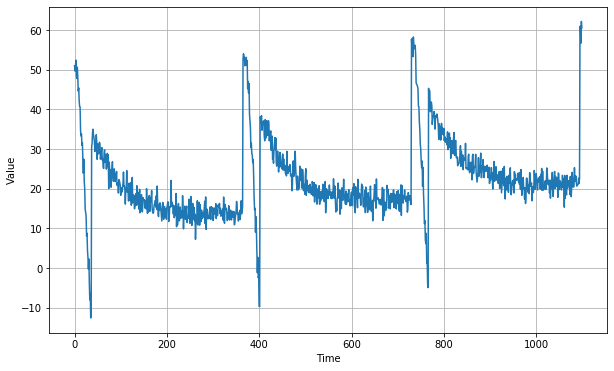

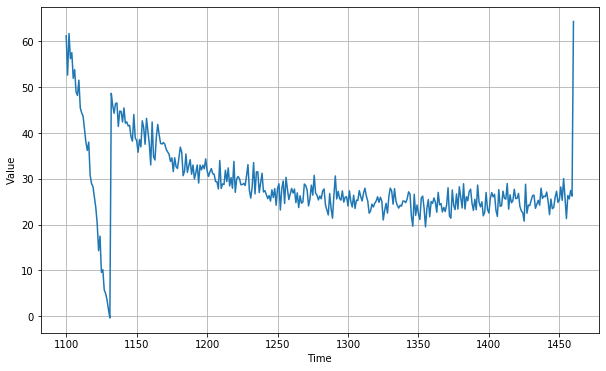

In [4]:
split_time = 1100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# EXPECTED OUTPUT
# Chart WITH 4 PEAKS between 50 and 65 and 3 troughs between -12 and 0
# Chart with 2 Peaks, first at slightly above 60, last at a little more than that, should also have a single trough at about 0

# Naive Forecast

In [9]:
naive_forecast = series[split_time - 1: -1]

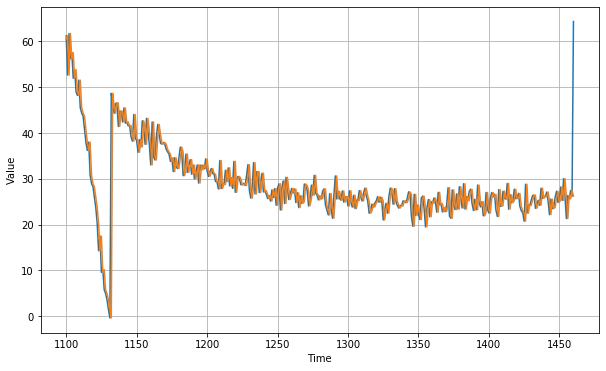

In [10]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

# Expected output: Chart similar to above, but with forecast overlay

Let's zoom in on the start of the validation period:

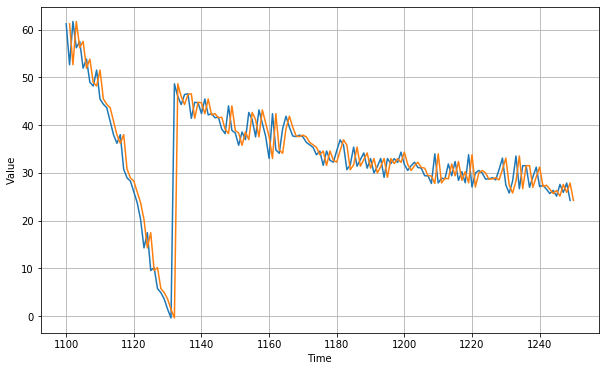

In [11]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

# EXPECTED - Chart with X-Axis from 1100-1250 and Y Axes with series value and projections. Projections should be time stepped 1 unit 'after' series

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [12]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())
# Expected Output
# 19.578304
# 2.6011968

19.578304
2.6011972


That's our baseline, now let's try a moving average:

In [13]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
    If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

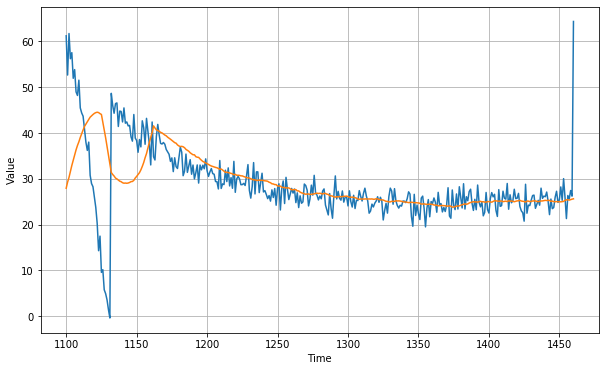

In [14]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
    
# EXPECTED OUTPUT
# CHart with time series from 1100->1450+ on X
# Time series plotted
# Moving average plotted over it

In [15]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())
# EXPECTED OUTPUT
# 65.786224
# 4.3040023

65.786224
4.3040023


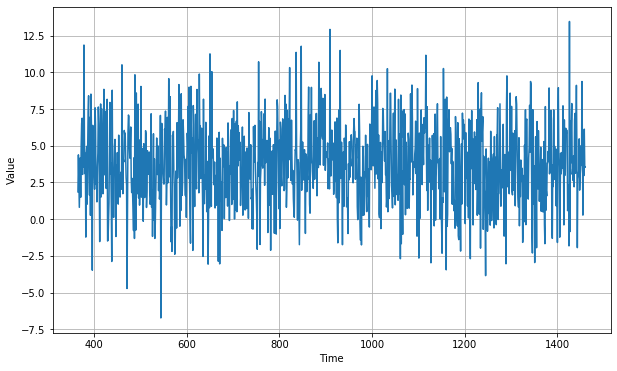

In [17]:
diff_series = (series[365:]- series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()
    
# EXPECETED OUTPUT: CHart with diffs

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

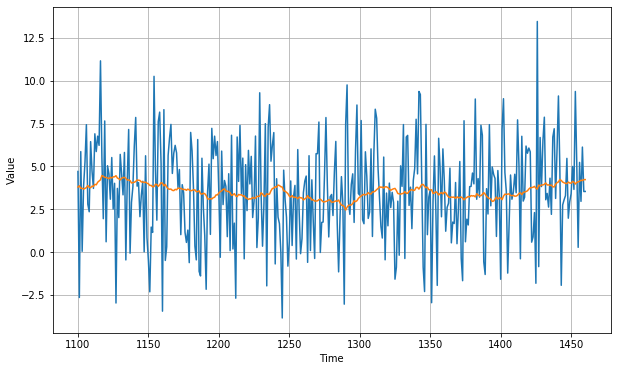

In [18]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365  - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()
            
# Expected output. Diff chart from 1100->1450 +
# Overlaid with moving average

Now let's bring back the trend and seasonality by adding the past values from t – 365:

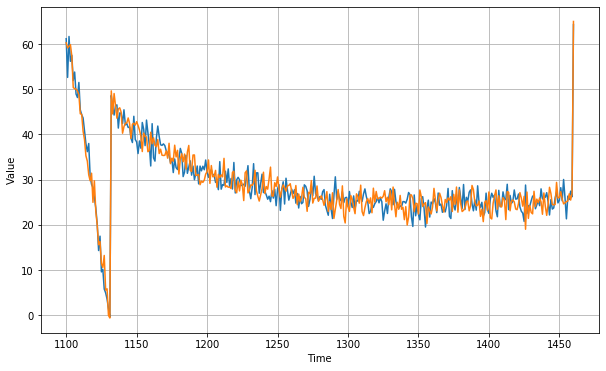

In [19]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()
# Expected output: Chart from 1100->1450+ on X. Same chart as earlier for time series, but projection overlaid looks close in value to it

In [20]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())
# EXPECTED OUTPUT
# 8.498155
# 2.327179

8.498155
2.327179


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

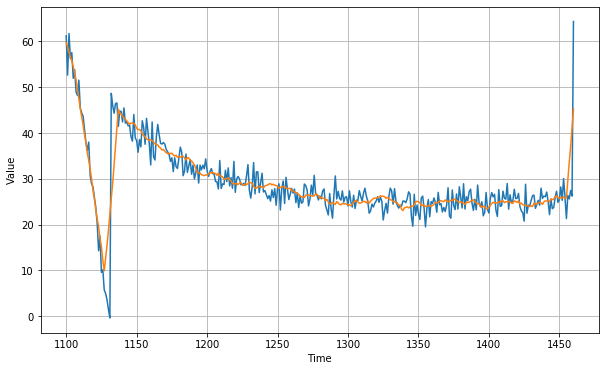

In [21]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()
            
# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

In [23]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
# EXPECTED OUTPUT
# 12.527958
# 2.2034433

12.527956
2.2034435


In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);